In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import plotly.express as px
#theres a spotify package
#makes a correlation matrix
import plotly.figure_factory as ff # HW 4
#go.Figure makes a pair plot
import plotly.graph_objs as go # HW4
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#import the undersampling package
from imblearn.under_sampling import RandomUnderSampler


# Load The Data

* found this dataset on [Kaggle](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)


In [2]:
mxmh_survey_results = pd.read_csv("mxmh_survey_results.csv")
mxmh_survey_results 

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

The frequency columns are categorical. We'll have to recode those to be numeric so we can run correlations.

## What are our features?

In [3]:
len(mxmh_survey_results.columns)

33

We have 33 features

In [4]:
mxmh_survey_results.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

* 16 unique genres considered
* BMP = Beats per minute of favorite genre
* All feature descriptions are on the kaggle site 

Data Types:

* Timestamp: Interval ##########################################################################################double check
* Age: Ratio
* Primary streaming service: Nominal
* Hours per day: Ratio
* While working: Binary (Yes, No)
* Instrumentalist: Binary (Yes, No)
* Composer: Binary (Yes, No)
* Fav genre: Nominal
* Exploratory: Binary (Yes, No)
* Foreign languages: Binary (Yes, No)
* BPM: Ratio ############################################################################################## double check, float so continuous?
* Frequency [Classical]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Country]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [EDM]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Folk]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Gospel]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Hip hop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Jazz]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [K pop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Latin]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Lofi]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Metal]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Pop]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [R&B]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Rap]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Rock]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Frequency [Video game music]: Ordinal (Never, Rarely, Sometimes, Very Frequently)
* Anxiety: Ordinal (Likert scale, 1-10)
* Depression: Ordinal (Likert scale, 1-10)
* Insomnia: Ordinal (Likert scale, 1-10)
* OCD: Ordinal (Likert scale, 1-10)
* Music effects: Ordinal (No effect, Improve, Worsen)
* Permissions: Binary (Yes, No)

# Investigate The Data

## Any Missing Vals?

In [5]:
mxmh_survey_results.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

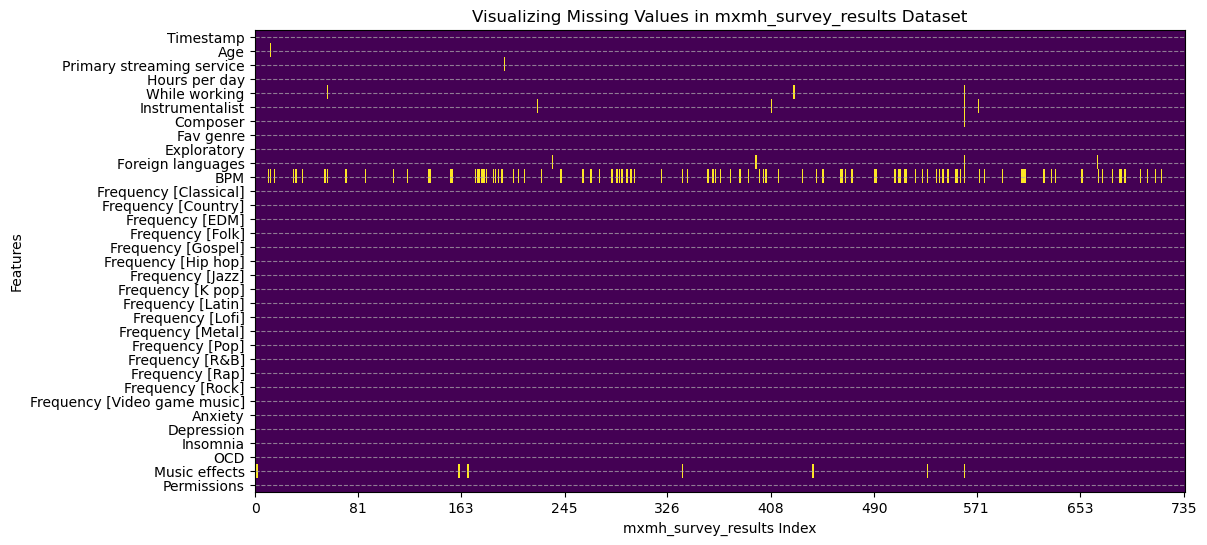

In [6]:
#make a heatmap of the missing data

##################Using code given in ICA 2 

#import numpy and nickname it np
import numpy as np 

#import matplotlib as plt
import matplotlib.pyplot as plt

#make a smaller dataset of just four colunns from planets 
#global_playlists_subset = global_playlists[["number", "orbital_period", "mass", "distance"]]
#I dont need just numerical right? Can I include my categoricals?

# create a boolean mask: True for NaN, False for finite values
nan_mask = mxmh_survey_results.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot 12 x 6 
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
# interpoltation is finding the best fit of data 
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

# label the x axis Planet Index
plt.xlabel('mxmh_survey_results Index')
# label the y axis Features
plt.ylabel('Features')
# title the whole plot Visualizing Missing Values in a Dataset 
plt.title('Visualizing Missing Values in mxmh_survey_results Dataset')

# y-axis tick labels to feature names
# make the y-axis go from 0 to 4 and label them the names of the subset columns
plt.yticks(range(len(mxmh_survey_results.columns)), mxmh_survey_results.columns)

# x-axis ticks
#
num_participants = nan_array.shape[0]
plt.xticks(np.linspace(0, num_participants-1, min(10, num_participants)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


## Plans To Handle Missing Data

* Age: delete if I explore that feature but keep them in the general analysis so I can use their other observed vals. Might explore that feature to see if there are differences between age groups.
* BPM: Ignore. Will not include in my analysis since it's self-reported.
* Primary streaming service: No plans to explore this one. Delete if I explore that feature but keep them in the general analysis so I can use their other observed vals.
* While Working: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore this later on.
* Music Effects: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore later.
* Instrumentalist + Compser: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals. I do plan to explore this later on.
* Foreign Lang: delete them when I explore that feature but keep them in the general analysis so I can use their other observed vals.

## Distribution of our Original Features

### Age

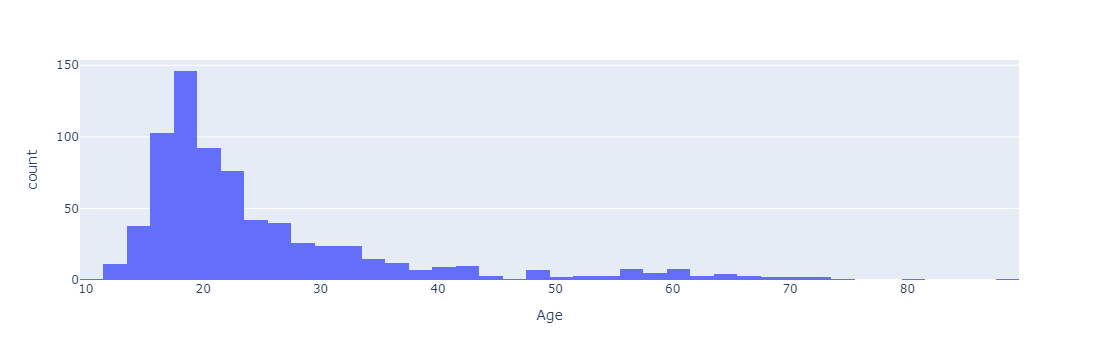

In [7]:
#age distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x="Age")
fig.show()

### Primary Streaming Service

In [8]:
#what are our platforms?
mxmh_survey_results["Primary streaming service"].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [9]:
#what values should I pick?
print(sum(mxmh_survey_results["Primary streaming service"] == "Spotify"))
print(sum(mxmh_survey_results["Primary streaming service"] == "Pandora"))
print(sum(mxmh_survey_results["Primary streaming service"] == "YouTube Music"))
print(sum(mxmh_survey_results["Primary streaming service"] == "I do not use a streaming service."))
print(sum(mxmh_survey_results["Primary streaming service"] == "Apple Music"))
print(sum(mxmh_survey_results["Primary streaming service"] == "'Other streaming service"))


458
11
94
71
51
0


Text(0, 0.5, 'Streaming Service')

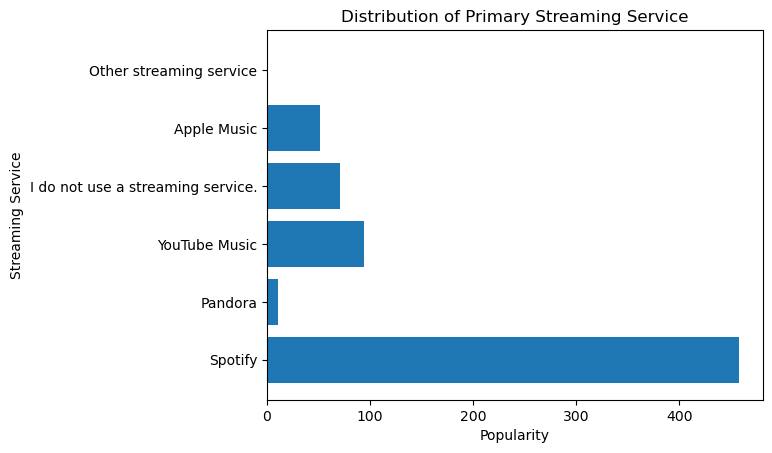

In [10]:
#primary streaming service (categorical horizontal barplot)
#HW 2

#create a variable that stores our platforms
platforms = ['Spotify', 'Pandora', 'YouTube Music', 'I do not use a streaming service.', 'Apple Music',  'Other streaming service']
popularity = [458, 11, 94, 71, 51, 0]
plt.barh(platforms, popularity)
#set the title 
plt.title('Distribution of Primary Streaming Service')
#set the x axis title
plt.xlabel('Popularity')
#set the y axis title 
plt.ylabel('Streaming Service')


### Fav genre

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

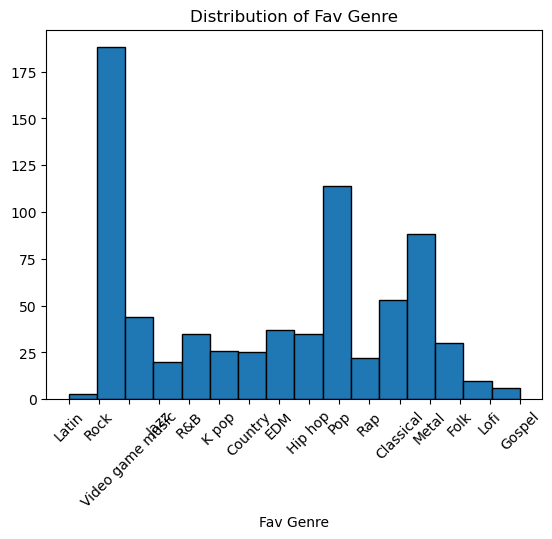

In [11]:
#fav genre distribution


#create the histogram
plt.hist(mxmh_survey_results["Fav genre"], bins=16, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Fav Genre')

#set the x-axis title
plt.xlabel('Fav Genre')
plt.xticks(rotation=45)

### Mental Health Scores

* I was making a single plot for each mental health column (like the cell below times 4) but then I used the code I got from AI in the section below (frequency plots) to edit my mental health plots into one to be less redundant. (I cited AI below when I plotted genre frequency because that's when I first asked AI for help with this topic. I edited the mental health plots afterward.) Please see below for my AI citation.

In [12]:
# #anxiety distribution
# #(HW 4)
# fig = px.histogram(mxmh_survey_results, x="Anxiety")
# fig.show()

In [13]:
#using the code I got from AI (citation below) to improve how I'm plotting the MH scores.

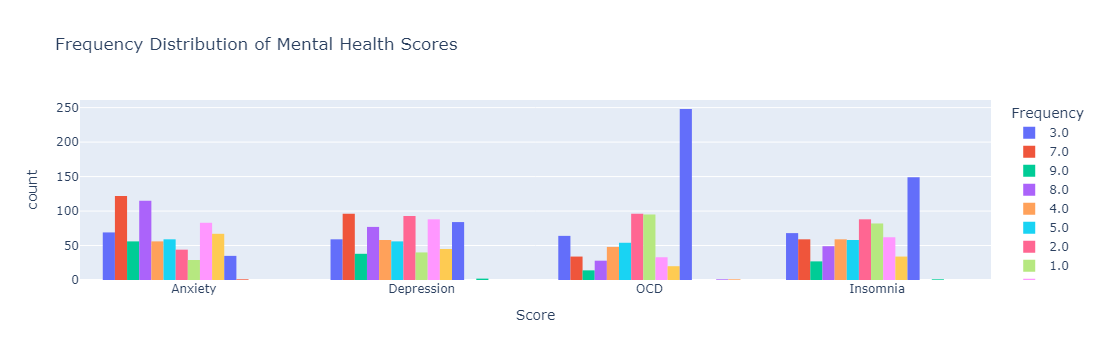

In [14]:
#make a subset so we're only focused on the frequency columns
mh_subset = mxmh_survey_results[["Anxiety", "Depression", "OCD", "Insomnia"]]


#convert the dataset from wide to long format
##the melt function reshapes the dataframe so that all genre frequencies are in a single column, with an additional column indicating the genre.
long_format_df = mh_subset.melt(var_name='Score', value_name='Frequency')

#order 'Frequency' column chronologically (why does this not work?)
order = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
long_format_df['Score'] = pd.Categorical(long_format_df['Score'], categories=order, ordered=True)


#create the histogram
fig = px.histogram(long_format_df, 
                   x='Score',  ######### x = frequency and color = genre will give you 4 sets of 16 bars
                   color='Frequency',  ###########
                  #this will give me 16 sets of 4 bars instead of 4 overlaid sets of bars
                   barmode='group', 
                   title='Frequency Distribution of Mental Health Scores')

# Show the plot
fig.show()


In [15]:
#I should  maybe round these up or down.

### Frequency [Genre]

* I was making a single plot for each Frequency (Genre) column (like the cell below times 16) but then I used AI to join them all in one plot so me code was less redundant.

In [16]:
# #frequency distribution
# #(HW 4)
# fig = px.histogram(mxmh_survey_results, x=('Frequency [Latin]'))
# fig.show()

## AI Citation

* I used AI to make a grouped frequency chart below instead of 16 individual plots.
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.

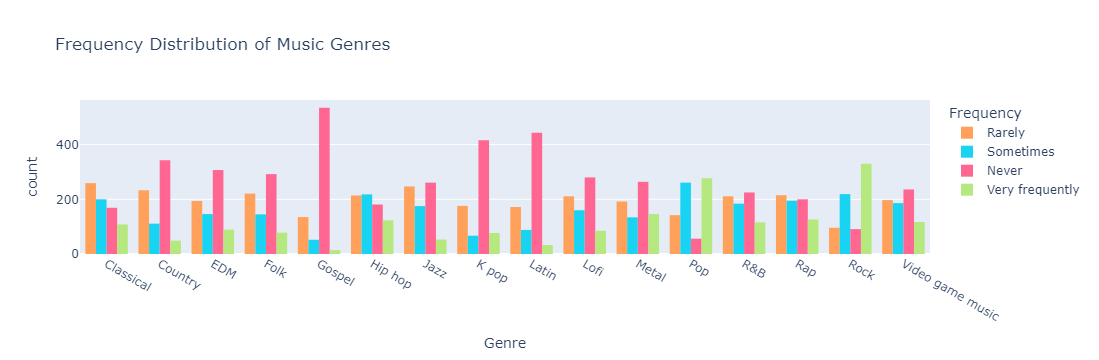

In [17]:
#make a subset so we're only focused on the frequency columns
frequency_subset = mxmh_survey_results[['Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']]


#rename the columns to keep only genre names using str.replace()
frequency_subset.columns = frequency_subset.columns.str.replace(r'Frequency \[(.*)\]', r'\1', regex=True)

#convert the dataset from wide to long format
##the melt function reshapes the dataframe so that all genre frequencies are in a single column, with an additional column indicating the genre.
long_format_df = frequency_subset.melt(var_name='Genre', value_name='Frequency')

#create the histogram
fig = px.histogram(long_format_df, 
                   x='Genre',  ######### x = frequency and color = genre will give you 4 sets of 16 bars
                   color='Frequency',  ###########
                  #this will give me 16 sets of 4 bars instead of 4 overlaid sets of bars
                   barmode='group', 
                   category_orders={
                       'Frequency': ['never', 'rarely', 'sometimes', 'very frequently']  # Custom order
                   },
                   title='Frequency Distribution of Music Genres')

# Show the plot
fig.show()


## Pair Plot

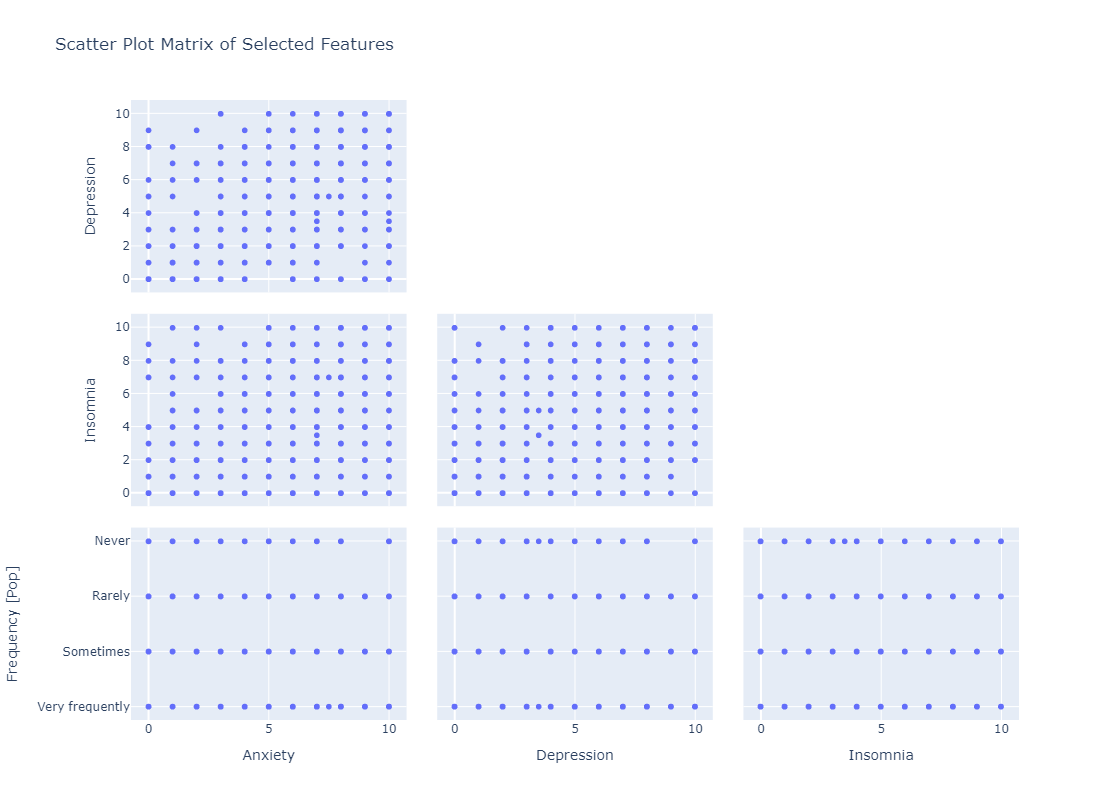

In [18]:
#looked at HW 4 code
#make a pair plot of all numeric features so we can see relationships between them all

#make a list of selected features
numeric_features = ['Anxiety', 'Depression', 'Insomnia', 'Frequency [Pop]']  

#make the plot
fig_splom = go.Figure(data=go.Splom(
    dimensions=[dict(label=col, values=mxmh_survey_results[col]) for col in numeric_features],
    showupperhalf=False,  # Only show the lower half of the matrix
    diagonal_visible=False  # Hide diagonal subplots
))

fig_splom.update_layout(
    title="Scatter Plot Matrix of Selected Features",
    dragmode='select',
    width=800,
    height=800
)

fig_splom.show()

### Hours Spent Per Day

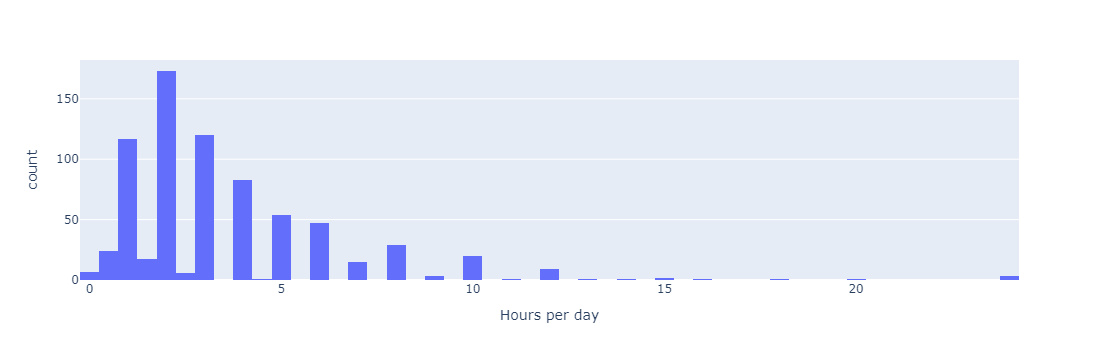

In [19]:
#frequency distribution
#(HW 4)
fig = px.histogram(mxmh_survey_results, x=('Hours per day'))
fig.show()

### Experts vs Non-experts

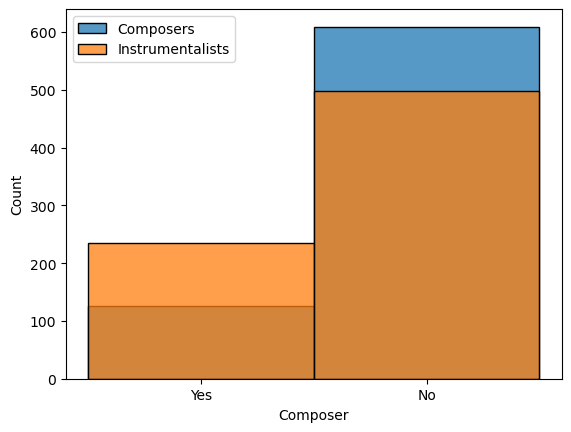

In [20]:
sns.histplot(data=mxmh_survey_results, x="Composer", bins=2, label = "Composers", multiple="stack")
sns.histplot(data=mxmh_survey_results, x="Instrumentalist", bins=2, label = "Instrumentalists")
plt.legend()
plt.show()


### Music Effects

<Axes: xlabel='Music effects', ylabel='Count'>

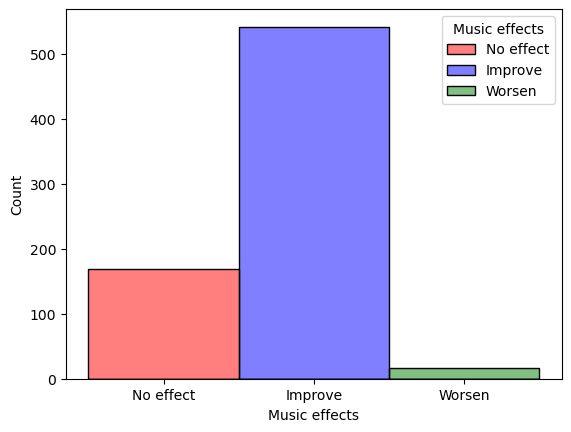

In [21]:
sns.histplot(data=mxmh_survey_results, x='Music effects', hue='Music effects', palette=['red', 'blue', 'green'])

### Outliers Exist; We'll Clean These Up Later

#### Frequency
* Gospel

#### Fav genre
* Latin
* Gospel

#### Hours Per Day

<Axes: xlabel='Hours per day', ylabel='Count'>

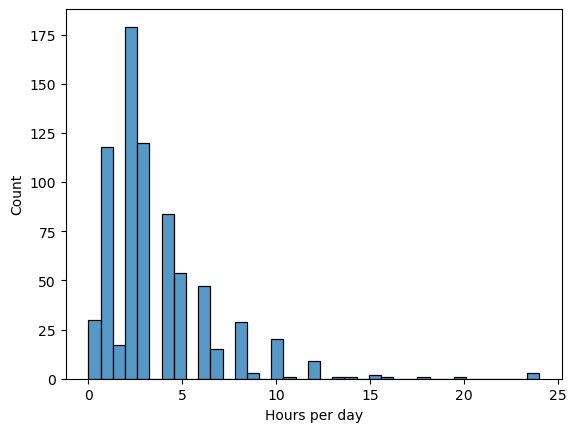

In [22]:
sns.histplot(data=mxmh_survey_results, x='Hours per day')

Some people said they listen 24 hours per day.

In [23]:
sum(mxmh_survey_results['Hours per day'] == 24)

3

#### Age

<Axes: xlabel='Age', ylabel='Count'>

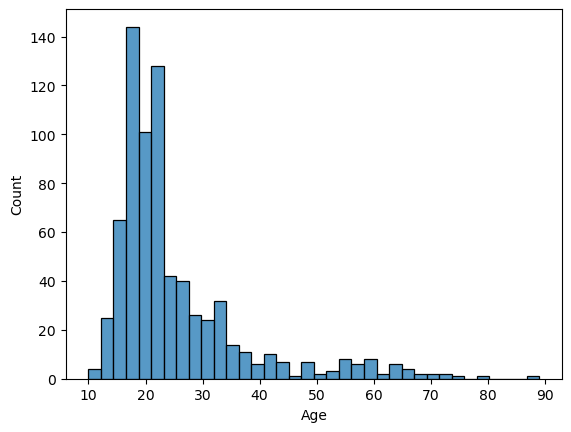

In [24]:
sns.histplot(data=mxmh_survey_results, x='Age')

In [25]:
sum(mxmh_survey_results['Age'] > 70)

6

## Clean / Manipulate Data (Wrangling)

### Handle Missing Data

In [26]:
### what are the median BPMs of each fav genre so I can make sure the handling worked correctly

#Testing with pop only
mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Pop"]["BPM"].median()

120.0

In [27]:
for i, val in enumerate(mxmh_survey_results["BPM"].isna()):
        #get the genre for the current row
        genre = mxmh_survey_results.loc[i, "Fav genre"]  
        if genre == "Latin":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Latin"]["BPM"].median()
        if genre == "Rock":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rock"]["BPM"].median()
        if genre == "Video game music":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Video game music"]["BPM"].median()
        if genre == "Jazz":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Jazz"]["BPM"].median()
        if genre == "R&B":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "R&B"]["BPM"].median()
        if genre == "K pop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "K pop"]["BPM"].median()
        if genre == "Country":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Country"]["BPM"].median()
        if genre == "EDM":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "EDM"]["BPM"].median()
        if genre == "Hip hop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Hip hop"]["BPM"].median()
        if genre == "Pop":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Pop"]["BPM"].median()
        if genre == "Rap":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Rap"]["BPM"].median()
        if genre == "Classical":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Classical"]["BPM"].median()
        if genre == "Metal":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Metal"]["BPM"].median()
        if genre == "Folk":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Folk"]["BPM"].median()
        if genre == "Lofi":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Lofi"]["BPM"].median()
        if genre == "Gospel":
            mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Gospel"]["BPM"].median()

In [28]:
#Are there 0 NAs in BPM now?
sum(mxmh_survey_results["BPM"].isna())

0

In [29]:
#testing: 
##This should all say 120 now
mxmh_survey_results["BPM"][mxmh_survey_results["Fav genre"] == "Pop"]

15     120.0
23     120.0
25     120.0
27     120.0
28     120.0
       ...  
722    120.0
723    120.0
724    120.0
729    120.0
732    120.0
Name: BPM, Length: 114, dtype: float64

In [30]:
mxmh_survey_results

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

In [31]:
#did this impact fav genre? No, can delete anytime
mxmh_survey_results["Fav genre"].nunique()

16

##### The remaining missing vals will be deleted when those features are analyzed.

##### Now that we're done handling missing values for now, let's rerun our missing vals heatmap:

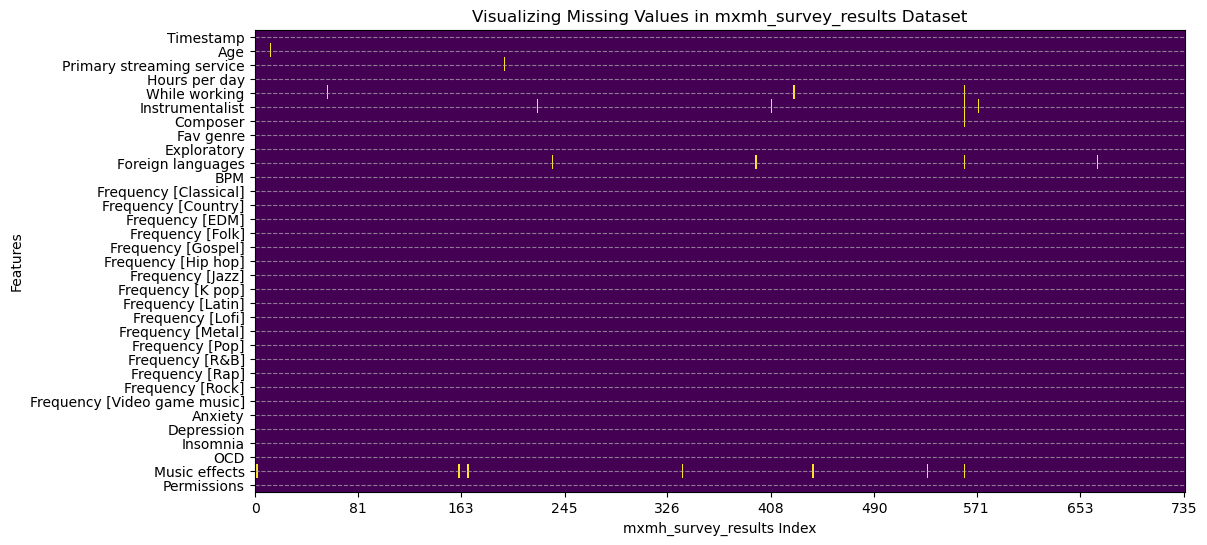

In [32]:
#make a heatmap of the missing data

##################Using code given in ICA 2 

#import numpy and nickname it np
import numpy as np 

#import matplotlib as plt
import matplotlib.pyplot as plt

#make a smaller dataset of just four colunns from planets 
#global_playlists_subset = global_playlists[["number", "orbital_period", "mass", "distance"]]
#I dont need just numerical right? Can I include my categoricals?

# create a boolean mask: True for NaN, False for finite values
nan_mask = mxmh_survey_results.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot 12 x 6 
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
# interpoltation is finding the best fit of data 
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

# label the x axis Planet Index
plt.xlabel('mxmh_survey_results Index')
# label the y axis Features
plt.ylabel('Features')
# title the whole plot Visualizing Missing Values in a Dataset 
plt.title('Visualizing Missing Values in mxmh_survey_results Dataset')

# y-axis tick labels to feature names
# make the y-axis go from 0 to 4 and label them the names of the subset columns
plt.yticks(range(len(mxmh_survey_results.columns)), mxmh_survey_results.columns)

# x-axis ticks
#
num_participants = nan_array.shape[0]
plt.xticks(np.linspace(0, num_participants-1, min(10, num_participants)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


### Handling Outliers 

#### Hours per day

In [33]:
#I don't trust the participants who say they listen to music 24hrs/day
cleaned_data = mxmh_survey_results.copy()
#I will say the max they could realistically listen to is 16 hrs
cleaned_data = cleaned_data[(cleaned_data["Hours per day"] < 16)]
cleaned_data.shape
#deleted 6 rows

(730, 33)

In [34]:
#did this delete a genre? Trying to fix an error I got later on
cleaned_data["Fav genre"].nunique()

16

In [35]:
#did this affect NAs? (asking because of an error I got later on)
cleaned_data.isna().sum()

Timestamp                       0
Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

#### Age

In [36]:
#what's are age range look like? What should my cutoff be?
cleaned_data["Age"].describe()

##It looks like taking away the 24hr responses above also took away the age=90 outliers, but there's still more.

#75% is under 28 and the sd is 11.8  
## I'll do 3 sds

count    729.000000
mean      25.160494
std       11.856295
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
cleaned_data = cleaned_data[(cleaned_data["Age"] > 18) & (cleaned_data["Age"] < 64)] ############ keep between 18 and 63 
cleaned_data.shape ######## took away 250 observations

(480, 33)

In [38]:

#did this delete a genre?
cleaned_data["Fav genre"].nunique()

########When I was balancing fav genre later on, I realized there were only 15 compared to the original 16. I just found out here that deleting Age outliers deleted a fav genre

15

In [39]:
#which one did it delete? ################# Latin 
cleaned_data["Fav genre"].unique()

array(['Rock', 'Jazz', 'K pop', 'EDM', 'Country', 'R&B', 'Classical',
       'Metal', 'Pop', 'Video game music', 'Rap', 'Folk', 'Hip hop',
       'Gospel', 'Lofi'], dtype=object)

In [40]:
#did this affect NAs? (asking because of an error I got later on)
cleaned_data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 1
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               2
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Should I delete genres that aren't popular? Those are basically outliers.

### Recode Frequency Values

In [41]:
''' List of these columns:
'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', '''

#what are the ranges?
cleaned_data["Frequency [Country]"].unique()


array(['Never', 'Very frequently', 'Rarely', 'Sometimes'], dtype=object)

## AI Citation

* I used AI to change the catgeorical values to numeric below.
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.

In [42]:
#This is from chatGPT

#define the mapping
#create the replacement values 
frequency_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Sometimes": 3,
    "Very frequently": 4
}

#replace the values in the frequency column from the values in the mapping
cleaned_data["Frequency [Latin]"] = cleaned_data["Frequency [Latin]"].replace(frequency_mapping)
cleaned_data["Frequency [Rock]"] = cleaned_data["Frequency [Rock]"].replace(frequency_mapping)
cleaned_data["Frequency [Video game music]"] = cleaned_data["Frequency [Video game music]"].replace(frequency_mapping)
cleaned_data["Frequency [Jazz]"] = cleaned_data["Frequency [Jazz]"].replace(frequency_mapping)
cleaned_data["Frequency [R&B]"] = cleaned_data["Frequency [R&B]"].replace(frequency_mapping)
cleaned_data["Frequency [K pop]"] = cleaned_data["Frequency [K pop]"].replace(frequency_mapping)
cleaned_data["Frequency [Country]"] = cleaned_data["Frequency [Country]"].replace(frequency_mapping)
cleaned_data["Frequency [EDM]"] = cleaned_data["Frequency [EDM]"].replace(frequency_mapping)
cleaned_data["Frequency [Hip hop]"] = cleaned_data["Frequency [Hip hop]"].replace(frequency_mapping)
cleaned_data["Frequency [Pop]"] = cleaned_data["Frequency [Pop]"].replace(frequency_mapping)
cleaned_data["Frequency [Rap]"] = cleaned_data["Frequency [Rap]"].replace(frequency_mapping)
cleaned_data["Frequency [Classical]"] = cleaned_data["Frequency [Classical]"].replace(frequency_mapping)
cleaned_data["Frequency [Metal]"] = cleaned_data["Frequency [Metal]"].replace(frequency_mapping)
cleaned_data["Frequency [Folk]"] = cleaned_data["Frequency [Folk]"].replace(frequency_mapping)
cleaned_data["Frequency [Lofi]"] = cleaned_data["Frequency [Lofi]"].replace(frequency_mapping)
cleaned_data["Frequency [Gospel]"] = cleaned_data["Frequency [Gospel]"].replace(frequency_mapping)




/tmp/local/45036650/ipykernel_2245434/3824825282.py:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/local/45036650/ipykernel_2245434/3824825282.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/local/45036650/ipykernel_2245434/3824825282.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [43]:
#did this delete a genre?
cleaned_data["Fav genre"].nunique()

15

In [44]:
#did any of this cleaning mess with fav genre? Yes, which one?
cleaned_data["Fav genre"].nunique()

15

In [45]:
cleaned_data ############## no NaNs

Timestamp   Age          Primary streaming service  \
1     8/27/2022 19:57:31  63.0                            Pandora   
3     8/27/2022 21:40:40  61.0                      YouTube Music   
7     8/27/2022 22:18:59  21.0                            Spotify   
8     8/27/2022 22:33:05  19.0                            Spotify   
11    8/27/2022 23:00:32  19.0                      YouTube Music   
..                   ...   ...                                ...   
729  10/30/2022 13:13:32  21.0  I do not use a streaming service.   
730  10/30/2022 13:15:26  21.0                            Spotify   
733   11/3/2022 23:24:38  19.0            Other streaming service   
734   11/4/2022 17:31:47  19.0                            Spotify   
735    11/9/2022 1:55:20  29.0                      YouTube Music   

     Hours per day While working Instrumentalist Composer  Fav genre  \
1              1.5           Yes              No       No       Rock   
3              2.5           Yes              No      Yes       Jazz   
7              1.0           Yes              No       No      K pop   
8              6.0           Yes              No       No       Rock   
11             8.0           Yes              No       No        EDM   
..             ...           ...             ...      ...        ...   
729            0.5            No              No       No        Pop   
730            2.0           Yes              No       No        R&B   
733            6.0           Yes              No      Yes        Rap   
734            5.0           Yes             Yes       No  Classical   
735            2.0           Yes              No       No    Hip hop   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
1           Yes                No  ...                3                2   
3           Yes               Yes  ...                3                1   
7           Yes               Yes  ...                3                2   
8            No                No  ...                1                1   
11          Yes                No  ...                2                3   
..          ...               ...  ...              ...              ...   
729         Yes                No  ...                3                3   
730         Yes               Yes  ...                4                3   
733         Yes                No  ...                3                3   
734          No                No  ...                1                1   
735         Yes               Yes  ...                4                4   

     Frequency [Rock]  Frequency [Video game music]  Anxiety  Depression  \
1                   4                             2      7.0         2.0   
3                   1                             1      9.0         7.0   
7                   1                             2      5.0         3.0   
8                   4                             1      2.0         0.0   
11                  2                             2      1.0         0.0   
..                ...                           ...      ...         ...   
729                 4                             1      6.0         2.0   
730                 3                             3      7.0         6.0   
733                 2                             2      2.0         2.0   
734                 1                             3      2.0         3.0   
735                 4                             2      2.0         2.0   

     Insomnia  OCD  Music effects    Permissions  
1         2.0  1.0            NaN  I understand.  
3         3.0  3.0        Improve  I understand.  
7         5.0  3.0        Improve  I understand.  
8         0.0  0.0        Improve  I understand.  
11        0.0  1.0        Improve  I understand.  
..        ...  ...            ...            ...  
729       2.0  0.0        Improve  I understand.  
730       4.0  6.0        Improve  I understand.  
733       2.0  2.0        Improve  I

## AI Citation

* I used AI to change encode the values and concatenate them back to the dataset
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.

## Encode Primary streaming service (one hot encoder)

In [46]:
# #initialize
# onehot = OneHotEncoder()
# #fit_transform "fits transformer to [data]... and returns a transformed version of [data]" (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
# encoded = onehot.fit_transform(cleaned_data[['Primary streaming service']])

# unique_values = cleaned_data['Primary streaming service'].unique()
# #create a list of strings that will be the encoded columns' titles
# #for each value in the column, create an element called "Pclass_ith  value"
# feature_names = [f'Primary streaming service_{val}' for val in unique_values]

# # convert to DataFrame
# #pass the encoded data into the DataFrame function and assign column names as feature_names
# #why do we use encoded.toarray() : "OneHotEncoder will by default return a sparse matrix, which is less intuitive to work with...However if you call toarray, you get something that is easier to work with, or at least easier to comprehend." (https://stackoverflow.com/questions/52846604/using-toarray-with-onehotencoding-during-data-preprocessing)
# encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
# #show the top 5 rows of the encoded dataframe
# #print(encoded_df.head())

# #add back to cleaned_data
# #concatenate encoded_df to cleaned_data
# #cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)
# #cleaned_data = cleaned_data.drop("Primary streaming service")
# #cleaned_data

# #reset index because it added NaNs when I didn't do this before concatenating 
# cleaned_data.reset_index(drop=True, inplace=True)
# encoded_df.reset_index(drop=True, inplace=True)

# #concatenate encoded_df to cleaned_data
# cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)

# # cleaned_data = cleaned_data.drop(columns=["Primary streaming service"])

In [47]:
# cleaned_data

In [48]:
## Encode Fav Genre (one hot encoder)

In [49]:
# #initialize
# onehot = OneHotEncoder()
# #fit_transform "fits transformer to [data]... and returns a transformed version of [data]" (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
# encoded = onehot.fit_transform(cleaned_data[['Fav genre']])

# unique_values = cleaned_data['Fav genre'].unique()
# #create a list of strings that will be the encoded columns' titles
# #for each value in the column, create an element called "Pclass_ith  value"
# feature_names = [f'Fav genre_{val}' for val in unique_values]

# # convert to DataFrame
# #pass the encoded data into the DataFrame function and assign column names as feature_names
# #why do we use encoded.toarray() : "OneHotEncoder will by default return a sparse matrix, which is less intuitive to work with...However if you call toarray, you get something that is easier to work with, or at least easier to comprehend." (https://stackoverflow.com/questions/52846604/using-toarray-with-onehotencoding-during-data-preprocessing)
# encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
# #show the top 5 rows of the encoded dataframe
# #print(encoded_df.head())

# #add back to cleaned_data
# #concatenate encoded_df to cleaned_data
# #cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)
# #cleaned_data = cleaned_data.drop("Primary streaming service")
# #cleaned_data

# #reset index because it added NaNs when I didn't do this before concatenating 
# cleaned_data.reset_index(drop=True, inplace=True)
# encoded_df.reset_index(drop=True, inplace=True)

# #concatenate encoded_df to cleaned_data
# cleaned_data = pd.concat([cleaned_data, encoded_df], axis=1)

# # cleaned_data = cleaned_data.drop(columns=["Primary streaming service"])

In [50]:
# cleaned_data

### Handle Imbalance (after using undersampling package)
* only balancing the 4 MH stats and fav genre

* reminder to self: I discovered earlier that Latin was deleted when I deleted Age outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Rock'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'K pop'),
  Text(3, 0, 'EDM'),
  Text(4, 0, 'Country'),
  Text(5, 0, 'R&B'),
  Text(6, 0, 'Classical'),
  Text(7, 0, 'Metal'),
  Text(8, 0, 'Pop'),
  Text(9, 0, 'Video game music'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Folk'),
  Text(12, 0, 'Hip hop'),
  Text(13, 0, 'Gospel'),
  Text(14, 0, 'Lofi')])

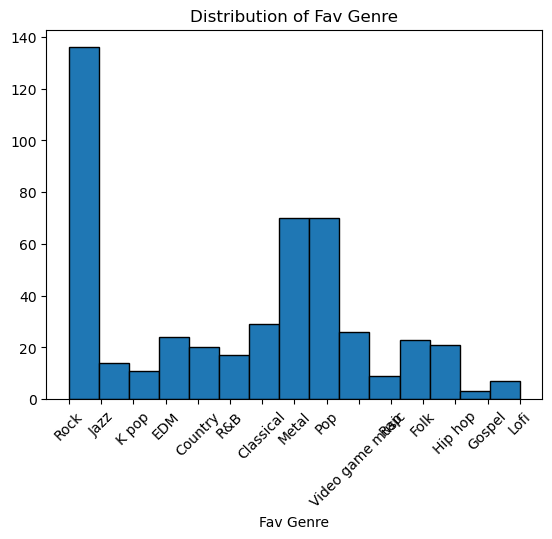

In [51]:
#balance fav genre first
#create the histogram
plt.hist(cleaned_data["Fav genre"], bins=15, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Fav Genre')

#set the x-axis title
plt.xlabel('Fav Genre')
plt.xticks(rotation=45)

I don't want to run the undersampling package on Fav genre because the minimum frequency is 3 (see below) and I don't want to only pick three observations from each genre. So instead, I'll cut some from Rock, which has way more observations than the others, so that the imbalance issue will be improved -- not solved, but improved.

In [52]:
#this is what I mean when I say the lowest frequency is 3:
cleaned_data["Fav genre"].value_counts()

Fav genre
Rock                136
Metal                70
Pop                  70
Classical            29
Video game music     26
EDM                  24
Folk                 23
Hip hop              21
Country              20
R&B                  17
Jazz                 14
K pop                11
Rap                   9
Lofi                  7
Gospel                3
Name: count, dtype: int64

In [53]:
#can I use a mean frequency count to replace the frequency of Rock?
values = cleaned_data["Fav genre"].value_counts()
values.median()

#I'll replace Rock, metal, and pop with 21 random observations since those two are also outliers


21.0

AI Citation:
* the way I was deleting rock observations didn't work so I had to use AI
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.

In [54]:
######### My original attempt
# length = len(cleaned_data[cleaned_data["Fav genre"] == "Rock"])
# num = 21
# #we'll use this as the random indicies 
# random_idx = np.random.randint(0, length, num)

# #keep only the indicies we just randomly generated
# cleaned_data = cleaned_data[cleaned_data["Fav genre"] == "Rock"].iloc[random_idx]

#AI's help:

# Randomly select indices of Rock observations
#only leave 21 observations left
num = 21
length = len(cleaned_data[cleaned_data["Fav genre"] == "Rock"])
drop_these_many = length - num
random_idx = np.random.choice(cleaned_data[cleaned_data["Fav genre"] == "Rock"].index, drop_these_many, replace=False)
#drop the selected indices from the DataFrame
cleaned_data = cleaned_data.drop(random_idx)

In [55]:
#did that work? Yes, that worked

# #balance fav genre first
# #create the histogram
# plt.hist(cleaned_data["Fav genre"], bins=15, edgecolor='black')

# #set the title of the plot
# plt.title('Distribution of Fav Genre')

# #set the x-axis title
# plt.xlabel('Fav Genre')
# plt.xticks(rotation=45)

In [56]:
# Randomly select indices of Rock observations
#only leave 21 observations left
num = 21
length = len(cleaned_data[cleaned_data["Fav genre"] == "Metal"])
drop_these_many = length - num
random_idx = np.random.choice(cleaned_data[cleaned_data["Fav genre"] == "Metal"].index, drop_these_many, replace=False)
#drop the selected indices from the DataFrame
cleaned_data = cleaned_data.drop(random_idx)

In [57]:
# Randomly select indices of Rock observations
#only leave 21 observations left
num = 21
length = len(cleaned_data[cleaned_data["Fav genre"] == "Pop"])
drop_these_many = length - num
random_idx = np.random.choice(cleaned_data[cleaned_data["Fav genre"] == "Pop"].index, drop_these_many, replace=False)
#drop the selected indices from the DataFrame
cleaned_data = cleaned_data.drop(random_idx)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Jazz'),
  Text(1, 0, 'K pop'),
  Text(2, 0, 'EDM'),
  Text(3, 0, 'Country'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'Classical'),
  Text(6, 0, 'Video game music'),
  Text(7, 0, 'Rap'),
  Text(8, 0, 'Folk'),
  Text(9, 0, 'Hip hop'),
  Text(10, 0, 'Rock'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Pop'),
  Text(13, 0, 'Gospel'),
  Text(14, 0, 'Lofi')])

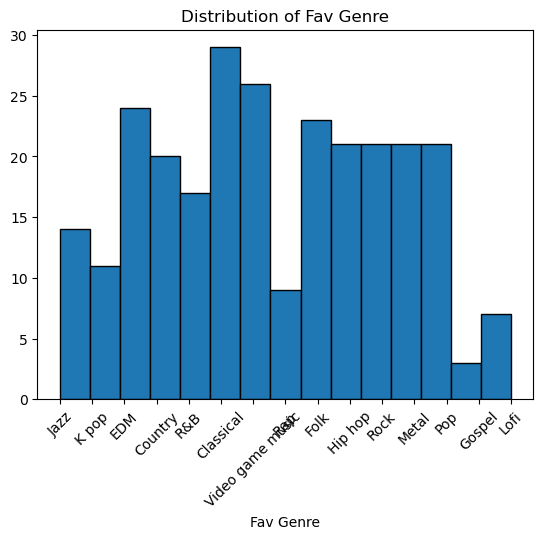

In [58]:
#how does Fav genre  look now? More balanced
#balance fav genre first
#create the histogram
plt.hist(cleaned_data["Fav genre"], bins=15, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Fav Genre')

#set the x-axis title
plt.xlabel('Fav Genre')
plt.xticks(rotation=45)

In [59]:
#do i need to reset the index? Because when I go to balance anxiety below, it's saying this error:
'''  '[2, 5, 8, 19, 23, 24, 26, 29, 32, 36, 38, 45, 47, 48, 54, 56, 68, 75, 76, 86, 99, 103, 104, 112, 113, 128, 132, 135, 137, 139, 
140, 143, 153, 155, 158, 167, 169, 172, 174, 175, 177, 185, 196, 205, 207, 212, 215, 220, 221, 224, 225, 229, 230, 231, 241, 246, 248, 249,
250, 265, 213, 50, 49, 257, 260, 80, 21, 201, 71, 106, 126, 37, 165, 28, 51, 27, 17, 14, 123, 116, 85, 211, 4, 141, 204, 237, 134, 41, 208, 
147, 34, 154, 254, 16, 200, 43, 63, 66, 9, 102, 15, 179, 0, 191, 181, 100, 70, 184, 44, 65, 35, 189, 122, 64, 142, 127, 171, 93, 111, 53] not in index' 
'''

#cleaned_data

"  '[2, 5, 8, 19, 23, 24, 26, 29, 32, 36, 38, 45, 47, 48, 54, 56, 68, 75, 76, 86, 99, 103, 104, 112, 113, 128, 132, 135, 137, 139, \n140, 143, 153, 155, 158, 167, 169, 172, 174, 175, 177, 185, 196, 205, 207, 212, 215, 220, 221, 224, 225, 229, 230, 231, 241, 246, 248, 249,\n250, 265, 213, 50, 49, 257, 260, 80, 21, 201, 71, 106, 126, 37, 165, 28, 51, 27, 17, 14, 123, 116, 85, 211, 4, 141, 204, 237, 134, 41, 208, \n147, 34, 154, 254, 16, 200, 43, 63, 66, 9, 102, 15, 179, 0, 191, 181, 100, 70, 184, 44, 65, 35, 189, 122, 64, 142, 127, 171, 93, 111, 53] not in index' \n"

In [60]:
#reset the index before balancing anxiety
##########why didn't i have to do this for valence, dancebility, and energy below? Maybe just because the second dataset is so large, the indices never overlapped
cleaned_data.reset_index(drop=True, inplace=True)

### Now let's balance Anxiety

In [61]:
#make it a binary category
cleaned_data["Anxiety_category"] = np.where(cleaned_data["Anxiety"] >= 5, 1, 0)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

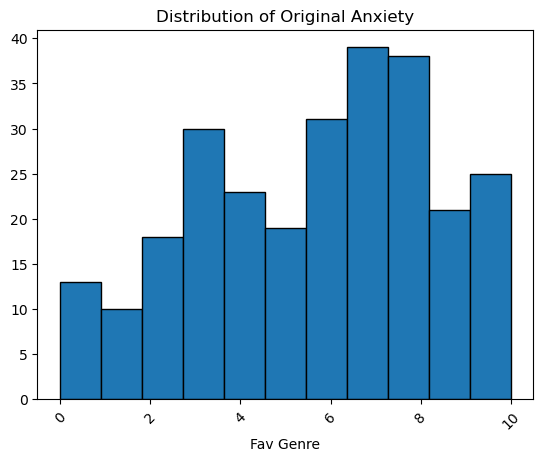

In [62]:
plt.hist(cleaned_data["Anxiety"], bins=11, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Original Anxiety')

#set the x-axis title
plt.xlabel('Fav Genre')
plt.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

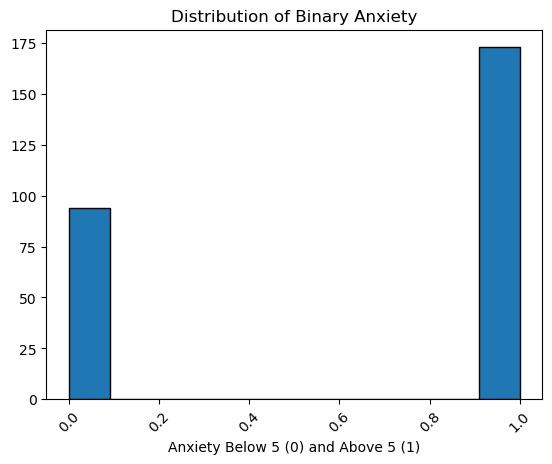

In [63]:
plt.hist(cleaned_data["Anxiety_category"], bins=11, edgecolor='black')

#set the title of the plot
plt.title('Distribution of Binary Anxiety')

#set the x-axis title
plt.xlabel('Anxiety Below 5 (0) and Above 5 (1)')
plt.xticks(rotation=45)

In [64]:
X = cleaned_data.drop(["Anxiety", "Anxiety_category"], axis=1)  
y = cleaned_data["Anxiety_category"] 

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Before Undersampling: \n{y.value_counts()}")
print(f"After Undersampling: \n{y_resampled.value_counts()}")


Before Undersampling: 
Anxiety_category
1    173
0     94
Name: count, dtype: int64
After Undersampling: 
Anxiety_category
0    94
1    94
Name: count, dtype: int64


In [65]:
resampled_indices = rus.sample_indices_

anxiety_resampled = cleaned_data.loc[resampled_indices, "Anxiety"]

cleaned_data = X_resampled.copy()  
cleaned_data["Anxiety"] = anxiety_resampled.values  


In [66]:
# #make a plot to see that it worked
# cleaned_data["Anxiety_category"] = np.where(cleaned_data["Anxiety"] >= 5, 1, 0)
# sns.histplot(data=cleaned_data, x='Anxiety_category')


In [67]:
# cleaned_data.drop(["Anxiety_category"], axis=1) 

In [68]:
#reset the index before balancing anxiety
cleaned_data.reset_index(drop=True, inplace=True)

### Now let's balance depression

In [69]:
#make it a binary category
cleaned_data["Depression_category"] = np.where(cleaned_data["Depression"] >= 5, 1, 0)

In [70]:
X = cleaned_data.drop(["Depression", "Depression_category"], axis=1)  
y = cleaned_data["Depression_category"] 

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Before Undersampling: \n{y.value_counts()}")
print(f"After Undersampling: \n{y_resampled.value_counts()}")


Before Undersampling: 
Depression_category
0    98
1    90
Name: count, dtype: int64
After Undersampling: 
Depression_category
0    90
1    90
Name: count, dtype: int64


In [71]:
resampled_indices = rus.sample_indices_

depression_resampled = cleaned_data.loc[resampled_indices, "Depression"]

cleaned_data = X_resampled.copy()  
cleaned_data["Depression"] = depression_resampled.values  


<Axes: xlabel='Depression_category', ylabel='Count'>

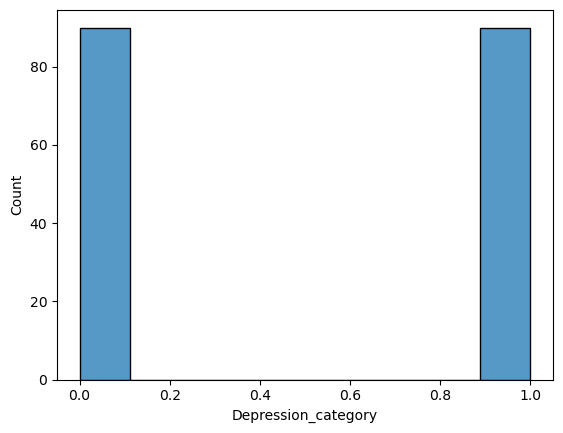

In [72]:
#make a plot to see that it worked
cleaned_data["Depression_category"] = np.where(cleaned_data["Depression"] >= 5, 1, 0)
sns.histplot(data=cleaned_data, x='Depression_category')


In [73]:
cleaned_data.drop(["Depression_category"], axis=1) 

Timestamp   Age          Primary streaming service  \
87   9/24/2022 10:25:15  20.0                            Spotify   
54    9/1/2022 16:58:12  58.0                      YouTube Music   
178  8/28/2022 16:53:26  19.0                        Apple Music   
28    8/29/2022 0:03:43  22.0                      YouTube Music   
130   9/3/2022 13:52:38  32.0                      YouTube Music   
..                  ...   ...                                ...   
180   8/29/2022 5:08:52  25.0                            Spotify   
182   8/29/2022 6:00:25  27.0                            Spotify   
183  8/28/2022 19:18:53  42.0                      YouTube Music   
184  8/29/2022 14:13:58  32.0                            Pandora   
186   9/1/2022 15:24:02  34.0  I do not use a streaming service.   

     Hours per day While working Instrumentalist Composer         Fav genre  \
87             6.0           Yes              No       No               R&B   
54             1.0           Yes             Yes      Yes         Classical   
178            3.0           Yes              No       No              Rock   
28             1.0           Yes              No       No  Video game music   
130            2.0           Yes              No       No              Folk   
..             ...           ...             ...      ...               ...   
180            3.0           Yes              No       No             Metal   
182            2.0            No              No       No               Pop   
183            2.5           Yes             Yes       No              Rock   
184            2.0           Yes             Yes       No         Classical   
186            2.0            No              No       No  Video game music   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
87          Yes               Yes  ...                4                4   
54          Yes                No  ...                1                1   
178         Yes               Yes  ...                2                3   
28          Yes               Yes  ...                1                1   
130         Yes                No  ...                3                3   
..          ...               ...  ...              ...              ...   
180          No                No  ...                3                1   
182          No                No  ...                1                3   
183          No               Yes  ...                2                2   
184         Yes                No  ...                3                2   
186          No               Yes  ...                1                3   

     Frequency [Rock]  Frequency [Video game music]  Insomnia  OCD  \
87                  1                             2       1.0  0.0   
54                  1                             1       2.0  1.0   
178                 4                             3       8.0  6.0   
28                  2                             4       0.0  7.0   
130                 3                             3       0.0  0.0   
..                ...                           ...       ...  ...   
180                 4                             3       6.0  2.0   
182                 3                             2       3.0  2.0   
183                 3                             2       7.0  6.0   
184                 4                             4       5.0  4.0   
186                 2                             4      10.0  0.0   

     Music effects    Permissions  Anxiety  Depression  
87         Improve  I understand.      4.0         1.0  
54         Improve  I understand.      0.0         0.0  
178        Improve  I understand.      5.0         2.0  
28       No effect  I understand.      3.0         3.0  
130        Improve  I understand.      6.0         1.0  
..             ...            ...      ...         ...  
180        Improve  I understand.      9.0         8.0  
182      No effect  I understand.     

In [74]:
#reset the index before balancing anxiety
cleaned_data.reset_index(drop=True, inplace=True)

### Is Anxiety still balanced? No. I don't want to balance OCD and Insomnia because those are severely imbalanced and I would just lose more data and in turn, make Anxiety and Depression imbalanced again.  So I'm gonna stop balancing here.

<Axes: xlabel='Anxiety_category', ylabel='Count'>

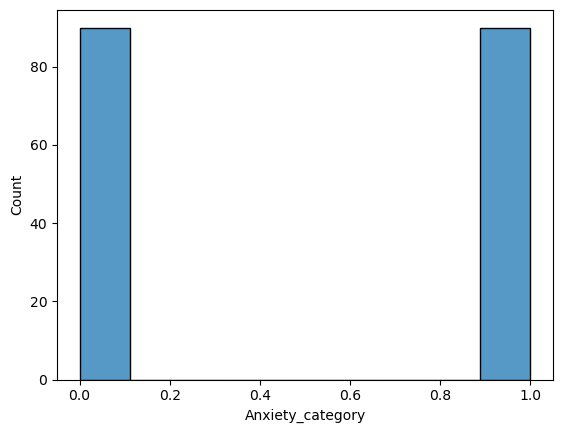

In [75]:
#make a plot to see that it worked
cleaned_data["Anxiety_category"] = np.where(cleaned_data["Anxiety"] >= 5, 1, 0)
sns.histplot(data=cleaned_data, x='Anxiety_category')


In [76]:
cleaned_data.drop(["Anxiety_category"], axis=1) 

Timestamp   Age          Primary streaming service  \
0    9/24/2022 10:25:15  20.0                            Spotify   
1     9/1/2022 16:58:12  58.0                      YouTube Music   
2    8/28/2022 16:53:26  19.0                        Apple Music   
3     8/29/2022 0:03:43  22.0                      YouTube Music   
4     9/3/2022 13:52:38  32.0                      YouTube Music   
..                  ...   ...                                ...   
175   8/29/2022 5:08:52  25.0                            Spotify   
176   8/29/2022 6:00:25  27.0                            Spotify   
177  8/28/2022 19:18:53  42.0                      YouTube Music   
178  8/29/2022 14:13:58  32.0                            Pandora   
179   9/1/2022 15:24:02  34.0  I do not use a streaming service.   

     Hours per day While working Instrumentalist Composer         Fav genre  \
0              6.0           Yes              No       No               R&B   
1              1.0           Yes             Yes      Yes         Classical   
2              3.0           Yes              No       No              Rock   
3              1.0           Yes              No       No  Video game music   
4              2.0           Yes              No       No              Folk   
..             ...           ...             ...      ...               ...   
175            3.0           Yes              No       No             Metal   
176            2.0            No              No       No               Pop   
177            2.5           Yes             Yes       No              Rock   
178            2.0           Yes             Yes       No         Classical   
179            2.0            No              No       No  Video game music   

    Exploratory Foreign languages  ...  Frequency [Rap]  Frequency [Rock]  \
0           Yes               Yes  ...                4                 1   
1           Yes                No  ...                1                 1   
2           Yes               Yes  ...                3                 4   
3           Yes               Yes  ...                1                 2   
4           Yes                No  ...                3                 3   
..          ...               ...  ...              ...               ...   
175          No                No  ...                1                 4   
176          No                No  ...                3                 3   
177          No               Yes  ...                2                 3   
178         Yes                No  ...                2                 4   
179          No               Yes  ...                3                 2   

     Frequency [Video game music]  Insomnia  OCD  Music effects  \
0                               2       1.0  0.0        Improve   
1                               1       2.0  1.0        Improve   
2                               3       8.0  6.0        Improve   
3                               4       0.0  7.0      No effect   
4                               3       0.0  0.0        Improve   
..                            ...       ...  ...            ...   
175                             3       6.0  2.0        Improve   
176                             2       3.0  2.0      No effect   
177                             2       7.0  6.0        Improve   
178                             4       5.0  4.0        Improve   
179                             4      10.0  0.0      No effect   

       Permissions  Anxiety  Depression  Depression_category  
0    I understand.      4.0         1.0                    0  
1    I understand.      0.0         0.0                    0  
2    I understand.      5.0         2.0                    0  
3    I understand.      3.0         3.0                    0  
4    I understand.      6.0         1.0                    0  
..             ...      ...         ...                  ...  
175  I understand.      9.0         8.0                    1  
176  I underst

In [77]:
#did this better above. This was before I figured out how to put these frequencies together well in one plot.
# #Genre Frequency
# #HW 5
# sns.histplot(cleaned_data["Frequency [Country]"], color='red', label='Country', kde=True) 
# sns.histplot(cleaned_data["Frequency [Rock]"], color='blue', label='Rock', kde=True) 
# sns.histplot(cleaned_data["Frequency [Lofi]"], color='yellow', label='Lofi', kde=True) 
# sns.histplot(cleaned_data["Frequency [EDM]"], color='green', label='EDM', kde=True) 
# sns.histplot(cleaned_data["Frequency [Classical]"], color='orange', label='Classical', kde=True) 
# sns.histplot(cleaned_data["Frequency [Hip hop]"], color='purple', label='Hip hop', kde=True) 

# Explore The Data

## How does MH Change With Age?

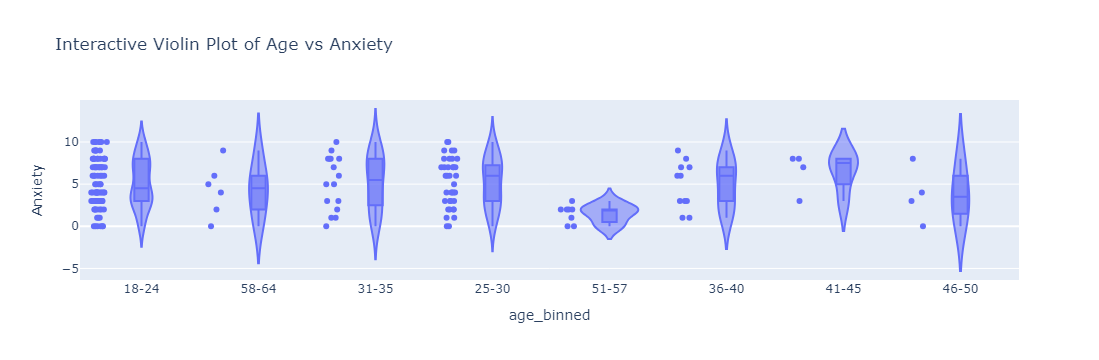

In [78]:
#How does anxiety change by age?

# #HW 4
# fig = px.scatter(mxmh_survey_results, x="Anxiety", y='Age')
# fig.show()



####################
#define the bin edges and labels
bins = [18, 25, 31, 36, 41, 46, 51, 58, 64]  
labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-57', '58-64']  # Labels for the bins

# Create the binned column
cleaned_data['age_binned'] = pd.cut(cleaned_data['Age'], bins=bins, labels=labels, right=False)

########################


#now plot it 
fig_violin = px.violin(cleaned_data, x='age_binned', y='Anxiety', box=True, points='all',
                           labels={'Age':'Age', 'Anxiety':'Anxiety'},
                           title="Interactive Violin Plot of Age vs Anxiety")

fig_violin.show()


## Any correlations? 

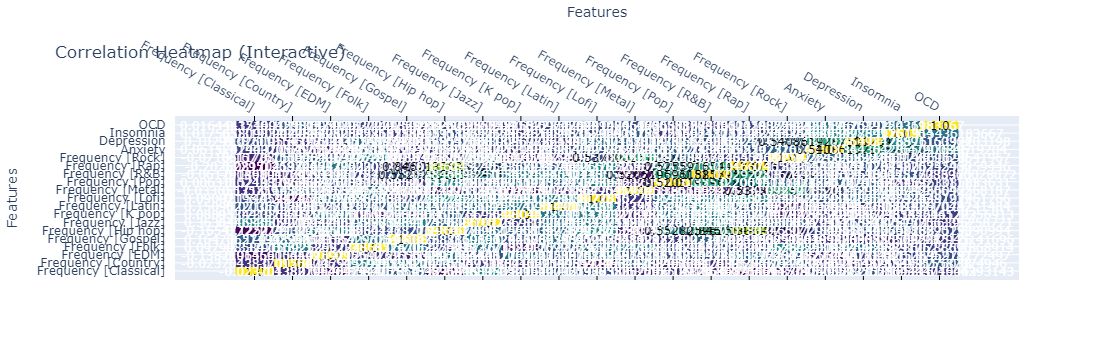

In [79]:
#make an interactive correlation heatmap (HW4)

#which features are important to consider here?
#not title, artists, date, Artist (Ind.), Nationality, Continent, Points (Ind for each Artist/Nat, id, Song URL
############what does # of nationality mean?
selected_features = ['Frequency [Classical]', "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 
                     "Frequency [Gospel]", "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]",
                     "Frequency [Metal]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]",  "Anxiety", "Depression", "Insomnia", "OCD"] # Focus on these variables

# Correlation Heatmap (Interactive)
correlation_matrix = cleaned_data[selected_features].corr().values
fig_heatmap = ff.create_annotated_heatmap(
     z=correlation_matrix,
     x=selected_features,
     y=selected_features,
     colorscale='Viridis'
 )
fig_heatmap.update_layout(
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()


### Any correlation between the numeric features? Is hours spent listening per day correlated with reported MH scores? Not strongly. (Do people who listen to more music report higher mental health scores?)

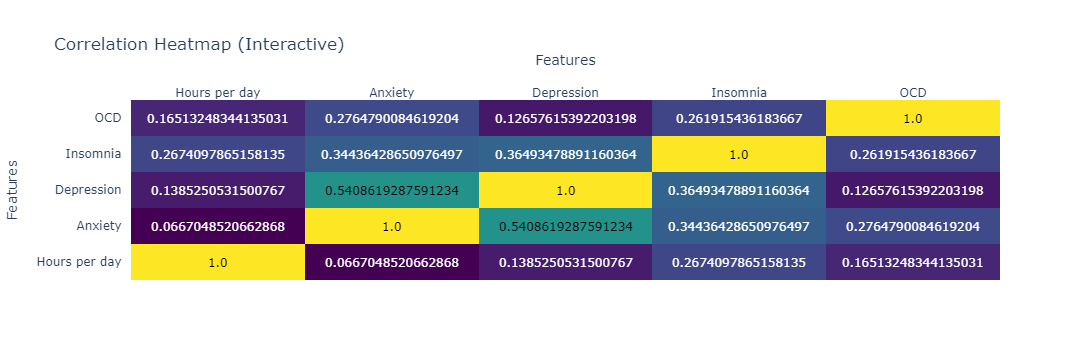

In [80]:
#make an interactive correlation heatmap (HW4)

#which features are important to consider here?
#not title, artists, date, Artist (Ind.), Nationality, Continent, Points (Ind for each Artist/Nat, id, Song URL
############what does # of nationality mean?
selected_features = ['Hours per day', "Anxiety", "Depression", "Insomnia", "OCD"] # Focus on these variables

# Correlation Heatmap (Interactive)
correlation_matrix = cleaned_data[selected_features].corr().values
fig_heatmap = ff.create_annotated_heatmap(
     z=correlation_matrix,
     x=selected_features,
     y=selected_features,
     colorscale='Viridis'
 )
fig_heatmap.update_layout(
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()


## Do the people who say music positively impacts MH spend more hours listening than those who say no?

In [81]:
#what are the levels of Music Effects?
cleaned_data["Music effects"].unique()

#note to self, .unique() gives a different output than .unique

array(['Improve', 'No effect', nan, 'Worsen'], dtype=object)

In [82]:
improve_subset = cleaned_data[cleaned_data["Music effects"] == "Improve"]
no_effect_subset = cleaned_data[cleaned_data["Music effects"] == "No effect"]
worsen_subset =  cleaned_data[cleaned_data["Music effects"] == "Worsen"]

In [83]:
print(improve_subset["Hours per day"].mean())
print(no_effect_subset["Hours per day"].mean())
print(worsen_subset["Hours per day"].mean())

3.3768939393939394
2.563953488372093
1.75


Improve and No Effect groups are almosed tied. Worsen group barely listens to music.

## Is fav genre associated with MH scores?

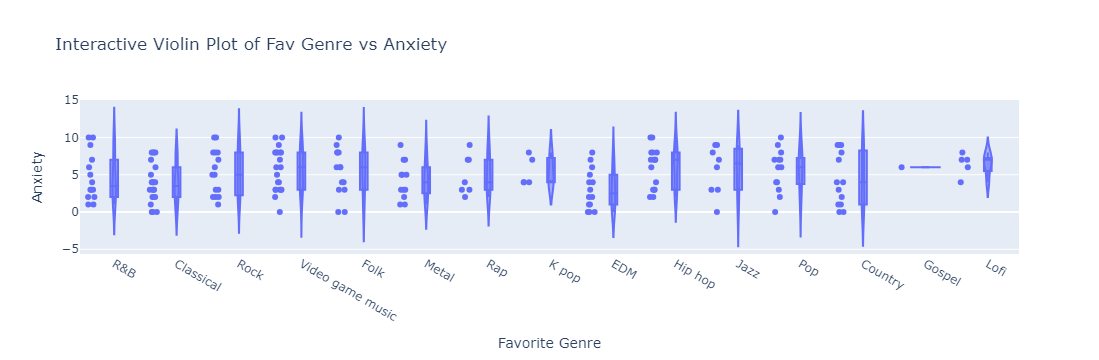

In [84]:
#Interactive Violin Plot 

fig_violin = px.violin(cleaned_data, x='Fav genre', y='Anxiety', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Anxiety':'Anxiety'},
                           title="Interactive Violin Plot of Fav Genre vs Anxiety")

fig_violin.show()


In [85]:
#why are there negative values for anxiety?
sum(cleaned_data["Anxiety"] < 0)

#This says there are none.

0

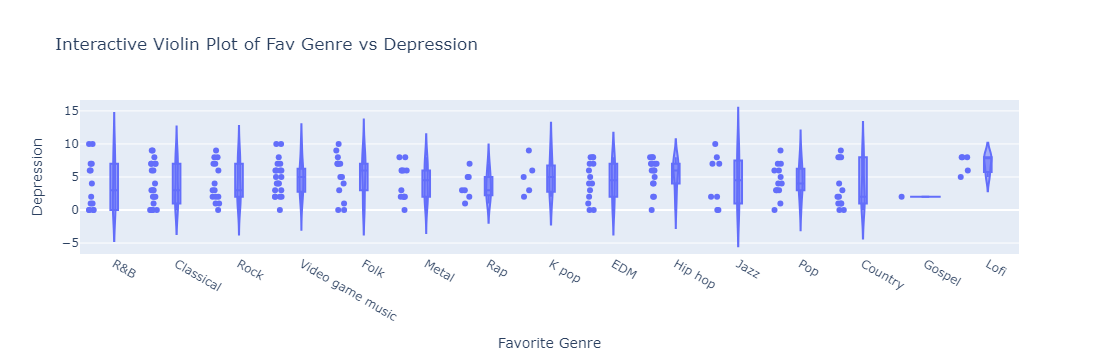

In [86]:
fig_violin = px.violin(cleaned_data, x='Fav genre', y='Depression', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Depression':'Depression'},
                           title="Interactive Violin Plot of Fav Genre vs Depression ")

fig_violin.show()


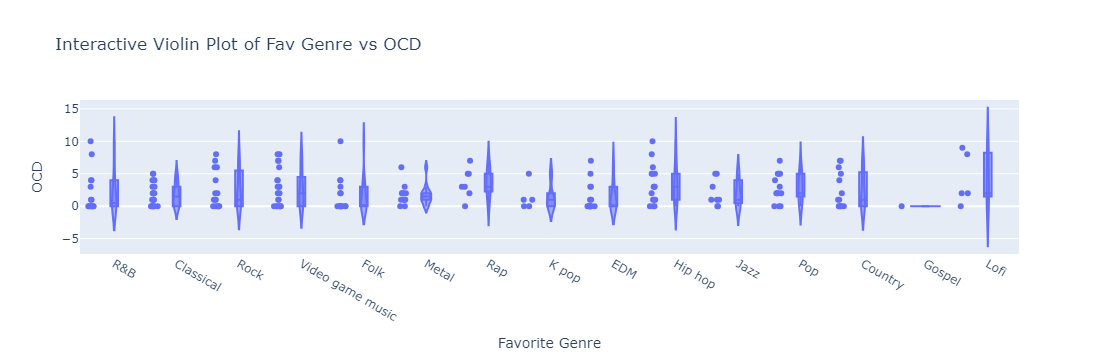

In [87]:

fig_violin = px.violin(cleaned_data, x='Fav genre', y='OCD', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'OCD':'OCD'},
                           title="Interactive Violin Plot of Fav Genre vs OCD")



fig_violin.show()


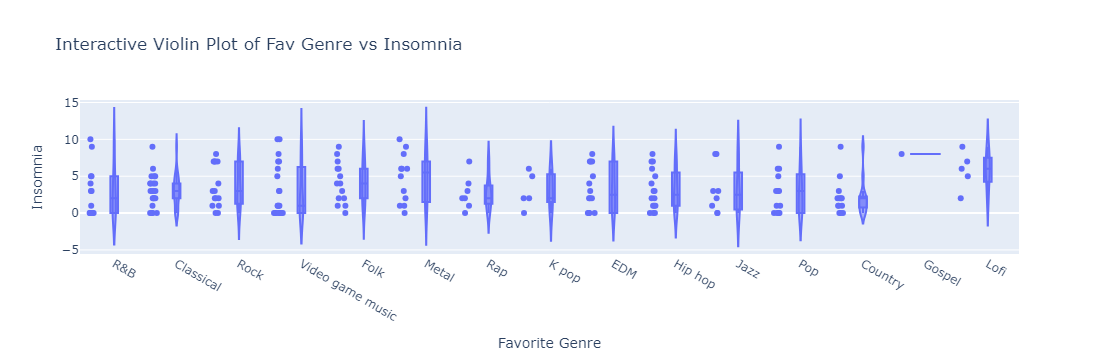

In [88]:
fig_violin = px.violin(cleaned_data, x='Fav genre', y='Insomnia', box=True, points='all',
                           labels={'Fav genre':'Favorite Genre', 'Insomnia':'Insomnia'},
                           title="Interactive Violin Plot of Fav Genre vs Insomnia")

fig_violin.show()


## Anxiety Scores by Genre. Does anxiety change depending on frequency of a given genre?

Text(0.5, 1.0, 'Anxiety Scores of Latin Listeners')

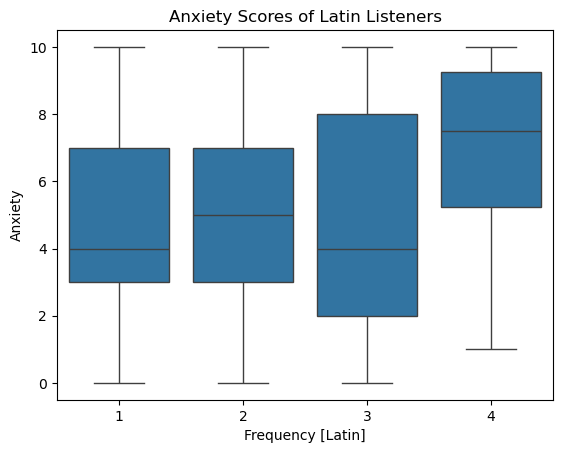

In [89]:
sns.boxplot(data=cleaned_data, x="Frequency [Latin]", y = "Anxiety")
plt.title('Anxiety Scores of Latin Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Rock Listeners')

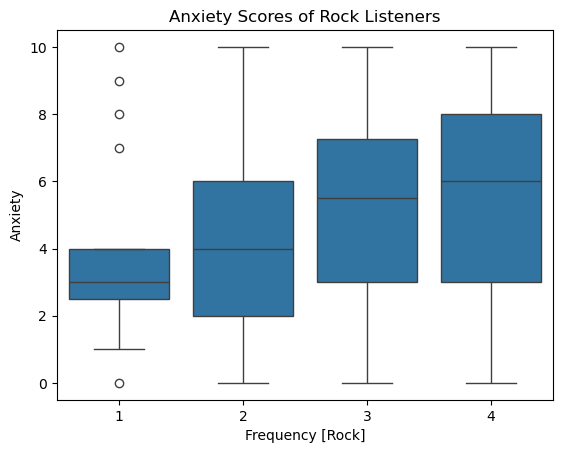

In [90]:
sns.boxplot(data=cleaned_data, x="Frequency [Rock]", y = "Anxiety")
plt.title('Anxiety Scores of Rock Listeners')

Text(0.5, 1.0, 'Anxiety Scores of VGM Listeners')

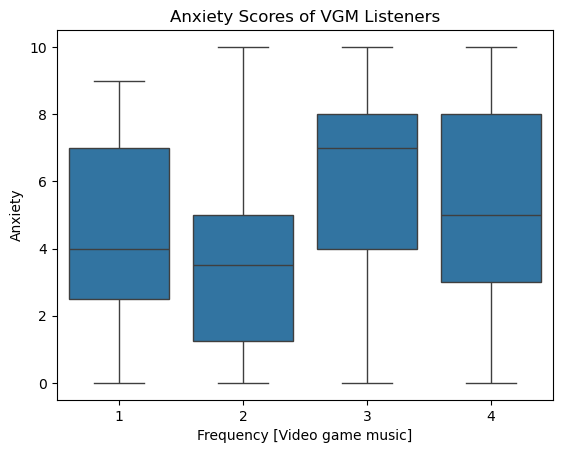

In [91]:
sns.boxplot(data=cleaned_data, x="Frequency [Video game music]", y = "Anxiety")
plt.title('Anxiety Scores of VGM Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Jazz Listeners')

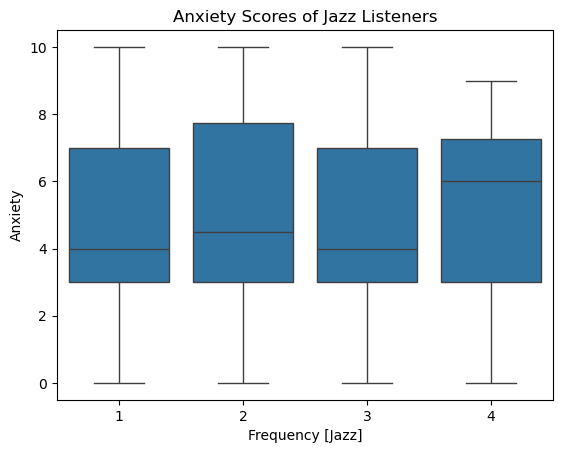

In [92]:
sns.boxplot(data=cleaned_data, x="Frequency [Jazz]", y = "Anxiety")
plt.title('Anxiety Scores of Jazz Listeners')

Text(0.5, 1.0, 'Anxiety Scores of R&B Listeners')

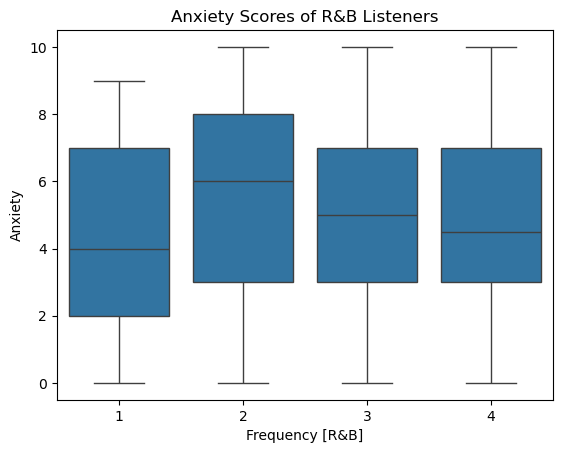

In [93]:
sns.boxplot(data=cleaned_data, x="Frequency [R&B]", y = "Anxiety")
plt.title('Anxiety Scores of R&B Listeners')

Text(0.5, 1.0, 'Anxiety Scores of K Pop Listeners')

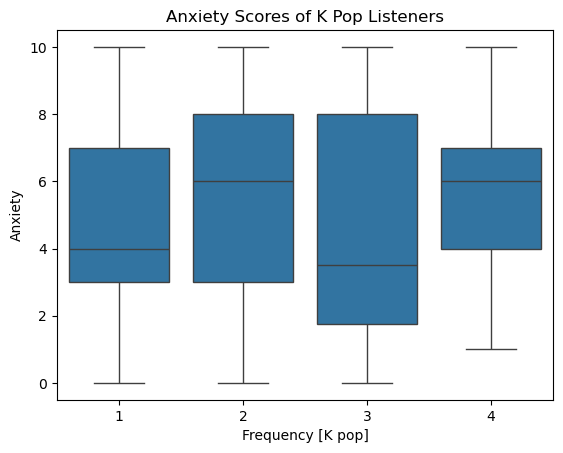

In [94]:
sns.boxplot(data=cleaned_data, x="Frequency [K pop]", y = "Anxiety")
plt.title('Anxiety Scores of K Pop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Country Listeners')

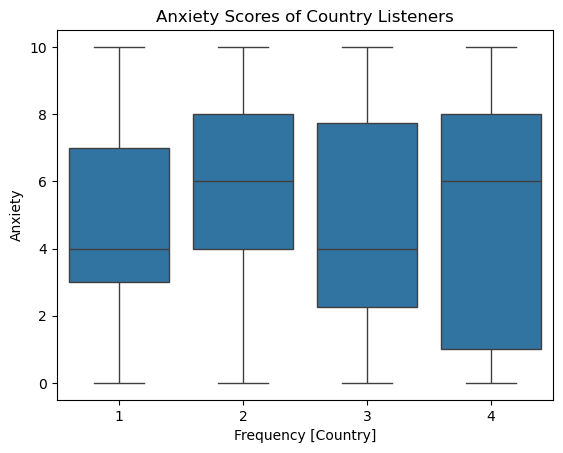

In [95]:
sns.boxplot(data=cleaned_data, x="Frequency [Country]", y = "Anxiety")
plt.title('Anxiety Scores of Country Listeners')

Text(0.5, 1.0, 'Anxiety Scores of EDM Listeners')

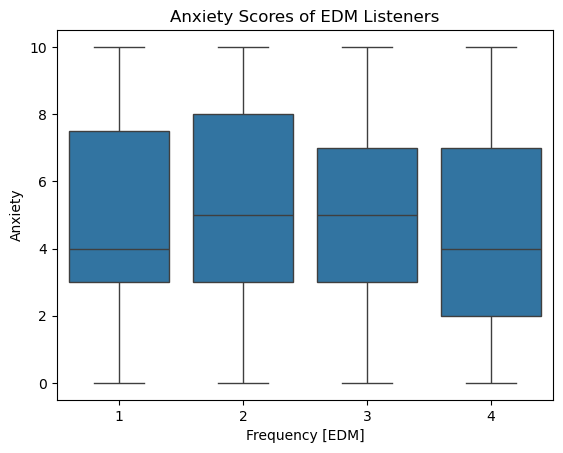

In [96]:
sns.boxplot(data=cleaned_data, x="Frequency [EDM]", y = "Anxiety")
plt.title('Anxiety Scores of EDM Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Hip Hop Listeners')

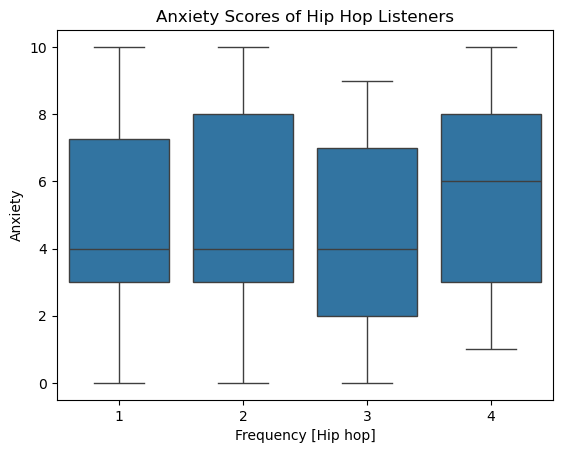

In [97]:
sns.boxplot(data=cleaned_data, x="Frequency [Hip hop]", y = "Anxiety")
plt.title('Anxiety Scores of Hip Hop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Pop Listeners')

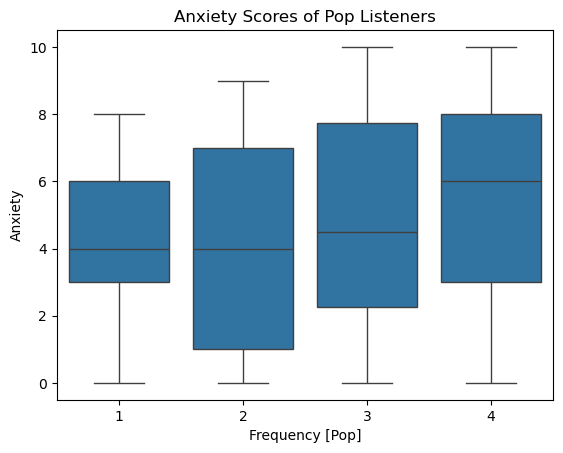

In [98]:
sns.boxplot(data=cleaned_data, x="Frequency [Pop]", y = "Anxiety")
plt.title('Anxiety Scores of Pop Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Rap Listeners')

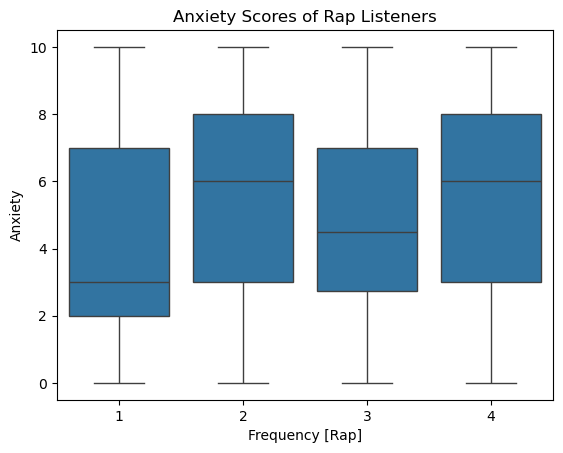

In [99]:
sns.boxplot(data=cleaned_data, x="Frequency [Rap]", y = "Anxiety")
plt.title('Anxiety Scores of Rap Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Classical Listeners')

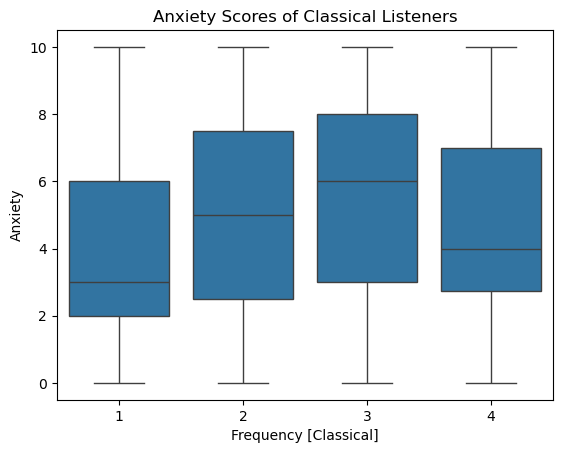

In [100]:
sns.boxplot(data=cleaned_data, x="Frequency [Classical]", y = "Anxiety")
plt.title('Anxiety Scores of Classical Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Metal Listeners')

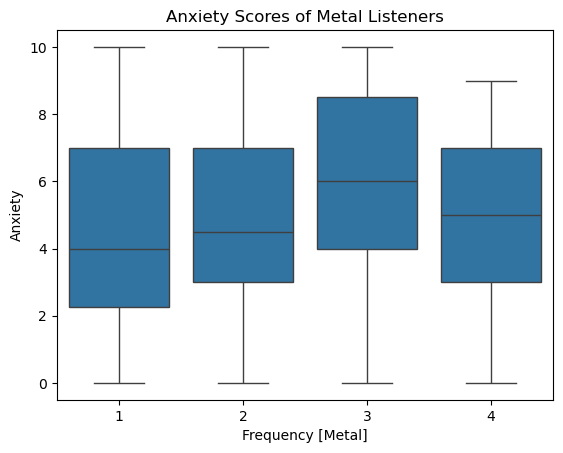

In [101]:
sns.boxplot(data=cleaned_data, x="Frequency [Metal]", y = "Anxiety")
plt.title('Anxiety Scores of Metal Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Folk Listeners')

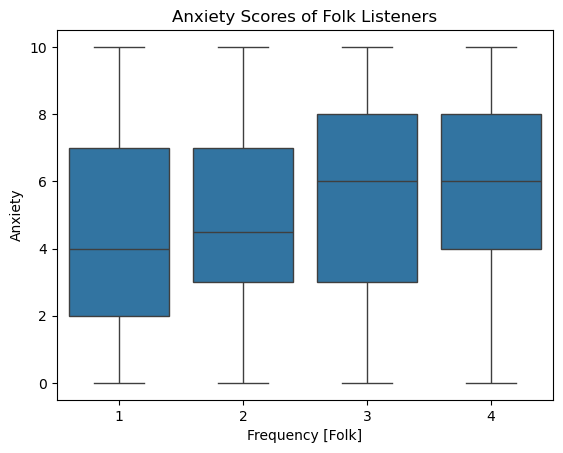

In [102]:
sns.boxplot(data=cleaned_data, x="Frequency [Folk]", y = "Anxiety")
plt.title('Anxiety Scores of Folk Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Lofi Listeners')

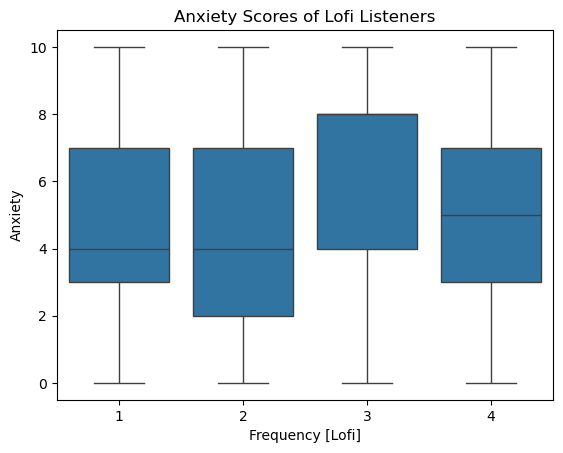

In [103]:
sns.boxplot(data=cleaned_data, x="Frequency [Lofi]", y = "Anxiety")
plt.title('Anxiety Scores of Lofi Listeners')

Text(0.5, 1.0, 'Anxiety Scores of Gospel Listeners')

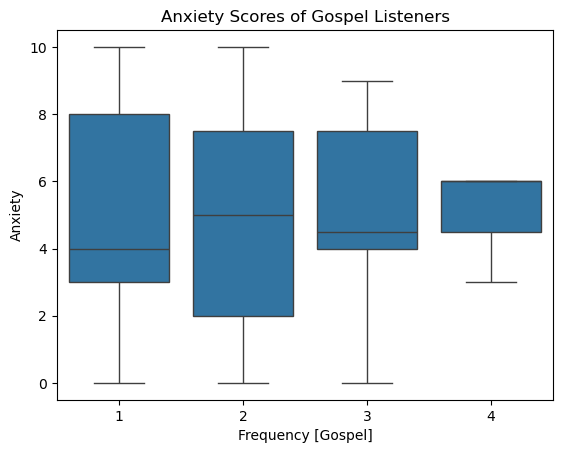

In [104]:
sns.boxplot(data=cleaned_data, x="Frequency [Gospel]", y = "Anxiety")
plt.title('Anxiety Scores of Gospel Listeners')

## Genre by Music Effects

In [105]:
# improve_subset = cleaned_data[cleaned_data["Music effects"] == "Improve"]
# no_effect_subset = cleaned_data[cleaned_data["Music effects"] == "No effect"]
# worsen_subset =  cleaned_data[cleaned_data["Music effects"] == "Worsen"]

In [106]:
# #do their anxiety levels match their perceived effect level?
# sns.histplot(data=improve_subset, x='Anxiety')

In [107]:
# sns.histplot(data=no_effect_subset, x='Anxiety')

In [108]:
# sns.histplot(data=worsen_subset, x='Anxiety')

## Feature engineering: Does MH change depending on genre, and does that change depending on frequency of genre listening?

* Let's make a feature called Effect where I have 0 or 1 for whether the genre is associated with higher mental health or lower. 

### Get average mh scores per genre grouped by frequency 

In [109]:
#making latin subsets based on frequency
cleaned_data_latin1 = cleaned_data[cleaned_data["Frequency [Latin]"] == 1]
cleaned_data_latin2 = cleaned_data[cleaned_data["Frequency [Latin]"] == 2]
cleaned_data_latin3 = cleaned_data[cleaned_data["Frequency [Latin]"] == 3]
cleaned_data_latin4 = cleaned_data[cleaned_data["Frequency [Latin]"] == 4]


#now get the average MH scores for each frequency
ave_anxiety_latin1 = cleaned_data_latin1["Anxiety"].mean()
ave_dep_latin1 = cleaned_data_latin1["Depression"].mean()
ave_insom_latin1 = cleaned_data_latin1["Insomnia"].mean()
ave_ocd_latin1 = cleaned_data_latin1["OCD"].mean()

ave_anxiety_latin2 = cleaned_data_latin2["Anxiety"].mean()
ave_dep_latin2 = cleaned_data_latin2["Depression"].mean()
ave_insom_latin2 = cleaned_data_latin2["Insomnia"].mean()
ave_ocd_latin2 = cleaned_data_latin2["OCD"].mean()

ave_anxiety_latin3 = cleaned_data_latin3["Anxiety"].mean()
ave_dep_latin3 = cleaned_data_latin3["Depression"].mean()
ave_insom_latin3 = cleaned_data_latin3["Insomnia"].mean()
ave_ocd_latin3 = cleaned_data_latin3["OCD"].mean()

ave_anxiety_latin4 = cleaned_data_latin4["Anxiety"].mean()
ave_dep_latin4 = cleaned_data_latin4["Depression"].mean()
ave_insom_latin4 = cleaned_data_latin4["Insomnia"].mean()
ave_ocd_latin4 = cleaned_data_latin4["OCD"].mean()



In [110]:
#making rock subsets based on frequency
cleaned_data_rock1 = cleaned_data[cleaned_data["Frequency [Rock]"] == 1]
cleaned_data_rock2 = cleaned_data[cleaned_data["Frequency [Rock]"] == 2]
cleaned_data_rock3 = cleaned_data[cleaned_data["Frequency [Rock]"] == 3]
cleaned_data_rock4 = cleaned_data[cleaned_data["Frequency [Rock]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rock1 = cleaned_data_rock1["Anxiety"].mean()
ave_dep_rock1 = cleaned_data_rock1["Depression"].mean()
ave_insom_rock1 = cleaned_data_rock1["Insomnia"].mean()
ave_ocd_rock1 = cleaned_data_rock1["OCD"].mean()

ave_anxiety_rock2 = cleaned_data_rock2["Anxiety"].mean()
ave_dep_rock2 = cleaned_data_rock2["Depression"].mean()
ave_insom_rock2 = cleaned_data_rock2["Insomnia"].mean()
ave_ocd_rock2 = cleaned_data_rock2["OCD"].mean()

ave_anxiety_rock3 = cleaned_data_rock3["Anxiety"].mean()
ave_dep_rock3 = cleaned_data_rock3["Depression"].mean()
ave_insom_rock3 = cleaned_data_rock3["Insomnia"].mean()
ave_ocd_rock3 = cleaned_data_rock3["OCD"].mean()

ave_anxiety_rock4 = cleaned_data_rock4["Anxiety"].mean()
ave_dep_rock4 = cleaned_data_rock4["Depression"].mean()
ave_insom_rock4 = cleaned_data_rock4["Insomnia"].mean()
ave_ocd_rock4 = cleaned_data_rock4["OCD"].mean()


In [111]:
#making Video game music subsets based on frequency
cleaned_data_vgm1 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 1]
cleaned_data_vgm2 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 2]
cleaned_data_vgm3 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 3]
cleaned_data_vgm4 = cleaned_data[cleaned_data["Frequency [Video game music]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_vgm1 = cleaned_data_vgm1["Anxiety"].mean()
ave_dep_vgm1 = cleaned_data_vgm1["Depression"].mean()
ave_insom_vgm1 = cleaned_data_vgm1["Insomnia"].mean()
ave_ocd_vgm1 = cleaned_data_vgm1["OCD"].mean()

ave_anxiety_vgm2 = cleaned_data_vgm2["Anxiety"].mean()
ave_dep_vgm2 = cleaned_data_vgm2["Depression"].mean()
ave_insom_vgm2 = cleaned_data_vgm2["Insomnia"].mean()
ave_ocd_vgm2 = cleaned_data_vgm2["OCD"].mean()

ave_anxiety_vgm3 = cleaned_data_vgm3["Anxiety"].mean()
ave_dep_vgm3 = cleaned_data_vgm3["Depression"].mean()
ave_insom_vgm3 = cleaned_data_vgm3["Insomnia"].mean()
ave_ocd_vgm3 = cleaned_data_vgm3["OCD"].mean()

ave_anxiety_vgm4 = cleaned_data_vgm4["Anxiety"].mean()
ave_dep_vgm4 = cleaned_data_vgm4["Depression"].mean()
ave_insom_vgm4 = cleaned_data_vgm4["Insomnia"].mean()
ave_ocd_vgm4 = cleaned_data_vgm4["OCD"].mean()


In [112]:
#making Jazz subsets based on frequency
cleaned_data_jazz1 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 1]
cleaned_data_jazz2 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 2]
cleaned_data_jazz3 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 3]
cleaned_data_jazz4 = cleaned_data[cleaned_data["Frequency [Jazz]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_jazz1 = cleaned_data_jazz1["Anxiety"].mean()
ave_dep_jazz1 = cleaned_data_jazz1["Depression"].mean()
ave_insom_jazz1 = cleaned_data_jazz1["Insomnia"].mean()
ave_ocd_jazz1 = cleaned_data_jazz1["OCD"].mean()

ave_anxiety_jazz2 = cleaned_data_jazz2["Anxiety"].mean()
ave_dep_jazz2 = cleaned_data_jazz2["Depression"].mean()
ave_insom_jazz2 = cleaned_data_jazz2["Insomnia"].mean()
ave_ocd_jazz2 = cleaned_data_jazz2["OCD"].mean()

ave_anxiety_jazz3 = cleaned_data_jazz3["Anxiety"].mean()
ave_dep_jazz3 = cleaned_data_jazz3["Depression"].mean()
ave_insom_jazz3 = cleaned_data_jazz3["Insomnia"].mean()
ave_ocd_jazz3 = cleaned_data_jazz3["OCD"].mean()

ave_anxiety_jazz4 = cleaned_data_jazz4["Anxiety"].mean()
ave_dep_jazz4 = cleaned_data_jazz4["Depression"].mean()
ave_insom_jazz4 = cleaned_data_jazz4["Insomnia"].mean()
ave_ocd_jazz4 = cleaned_data_jazz4["OCD"].mean()


In [113]:
#making R&B subsets based on frequency
cleaned_data_rnb1 = cleaned_data[cleaned_data["Frequency [R&B]"] == 1]
cleaned_data_rnb2 = cleaned_data[cleaned_data["Frequency [R&B]"] == 2]
cleaned_data_rnb3 = cleaned_data[cleaned_data["Frequency [R&B]"] == 3]
cleaned_data_rnb4 = cleaned_data[cleaned_data["Frequency [R&B]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rnb1 = cleaned_data_rnb1["Anxiety"].mean()
ave_dep_rnb1 = cleaned_data_rnb1["Depression"].mean()
ave_insom_rnb1 = cleaned_data_rnb1["Insomnia"].mean()
ave_ocd_rnb1 = cleaned_data_rnb1["OCD"].mean()

ave_anxiety_rnb2 = cleaned_data_rnb2["Anxiety"].mean()
ave_dep_rnb2 = cleaned_data_rnb2["Depression"].mean()
ave_insom_rnb2 = cleaned_data_rnb2["Insomnia"].mean()
ave_ocd_rnb2 = cleaned_data_rnb2["OCD"].mean()

ave_anxiety_rnb3 = cleaned_data_rnb3["Anxiety"].mean()
ave_dep_rnb3 = cleaned_data_rnb3["Depression"].mean()
ave_insom_rnb3 = cleaned_data_rnb3["Insomnia"].mean()
ave_ocd_rnb3 = cleaned_data_rnb3["OCD"].mean()

ave_anxiety_rnb4 = cleaned_data_rnb4["Anxiety"].mean()
ave_dep_rnb4 = cleaned_data_rnb4["Depression"].mean()
ave_insom_rnb4 = cleaned_data_rnb4["Insomnia"].mean()
ave_ocd_rnb4 = cleaned_data_rnb4["OCD"].mean()


In [114]:
#making K pop subsets based on frequency
cleaned_data_kpop1 = cleaned_data[cleaned_data["Frequency [K pop]"] == 1]
cleaned_data_kpop2 = cleaned_data[cleaned_data["Frequency [K pop]"] == 2]
cleaned_data_kpop3 = cleaned_data[cleaned_data["Frequency [K pop]"] == 3]
cleaned_data_kpop4 = cleaned_data[cleaned_data["Frequency [K pop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_kpop1 = cleaned_data_kpop1["Anxiety"].mean()
ave_dep_kpop1 = cleaned_data_kpop1["Depression"].mean()
ave_insom_kpop1 = cleaned_data_kpop1["Insomnia"].mean()
ave_ocd_kpop1 = cleaned_data_kpop1["OCD"].mean()

ave_anxiety_kpop2 = cleaned_data_kpop2["Anxiety"].mean()
ave_dep_kpop2 = cleaned_data_kpop2["Depression"].mean()
ave_insom_kpop2 = cleaned_data_kpop2["Insomnia"].mean()
ave_ocd_kpop2 = cleaned_data_kpop2["OCD"].mean()

ave_anxiety_kpop3 = cleaned_data_kpop3["Anxiety"].mean()
ave_dep_kpop3 = cleaned_data_kpop3["Depression"].mean()
ave_insom_kpop3 = cleaned_data_kpop3["Insomnia"].mean()
ave_ocd_kpop3 = cleaned_data_kpop3["OCD"].mean()

ave_anxiety_kpop4 = cleaned_data_kpop4["Anxiety"].mean()
ave_dep_kpop4 = cleaned_data_kpop4["Depression"].mean()
ave_insom_kpop4 = cleaned_data_kpop4["Insomnia"].mean()
ave_ocd_kpop4 = cleaned_data_kpop4["OCD"].mean()


In [115]:
#making Country subsets based on frequency
cleaned_data_country1 = cleaned_data[cleaned_data["Frequency [Country]"] == 1]
cleaned_data_country2 = cleaned_data[cleaned_data["Frequency [Country]"] == 2]
cleaned_data_country3 = cleaned_data[cleaned_data["Frequency [Country]"] == 3]
cleaned_data_country4 = cleaned_data[cleaned_data["Frequency [Country]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_country1 = cleaned_data_country1["Anxiety"].mean()
ave_dep_country1 = cleaned_data_country1["Depression"].mean()
ave_insom_country1 = cleaned_data_country1["Insomnia"].mean()
ave_ocd_country1 = cleaned_data_country1["OCD"].mean()

ave_anxiety_country2 = cleaned_data_country2["Anxiety"].mean()
ave_dep_country2 = cleaned_data_country2["Depression"].mean()
ave_insom_country2 = cleaned_data_country2["Insomnia"].mean()
ave_ocd_country2 = cleaned_data_country2["OCD"].mean()

ave_anxiety_country3 = cleaned_data_country3["Anxiety"].mean()
ave_dep_country3 = cleaned_data_country3["Depression"].mean()
ave_insom_country3 = cleaned_data_country3["Insomnia"].mean()
ave_ocd_country3 = cleaned_data_country3["OCD"].mean()

ave_anxiety_country4 = cleaned_data_country4["Anxiety"].mean()
ave_dep_country4 = cleaned_data_country4["Depression"].mean()
ave_insom_country4 = cleaned_data_country4["Insomnia"].mean()
ave_ocd_country4 = cleaned_data_country4["OCD"].mean()


In [116]:
#making EDM subsets based on frequency
cleaned_data_edm1 = cleaned_data[cleaned_data["Frequency [EDM]"] == 1]
cleaned_data_edm2 = cleaned_data[cleaned_data["Frequency [EDM]"] == 2]
cleaned_data_edm3 = cleaned_data[cleaned_data["Frequency [EDM]"] == 3]
cleaned_data_edm4 = cleaned_data[cleaned_data["Frequency [EDM]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_edm1 = cleaned_data_edm1["Anxiety"].mean()
ave_dep_edm1 = cleaned_data_edm1["Depression"].mean()
ave_insom_edm1 = cleaned_data_edm1["Insomnia"].mean()
ave_ocd_edm1 = cleaned_data_edm1["OCD"].mean()

ave_anxiety_edm2 = cleaned_data_edm2["Anxiety"].mean()
ave_dep_edm2 = cleaned_data_edm2["Depression"].mean()
ave_insom_edm2 = cleaned_data_edm2["Insomnia"].mean()
ave_ocd_edm2 = cleaned_data_edm2["OCD"].mean()

ave_anxiety_edm3 = cleaned_data_edm3["Anxiety"].mean()
ave_dep_edm3 = cleaned_data_edm3["Depression"].mean()
ave_insom_edm3 = cleaned_data_edm3["Insomnia"].mean()
ave_ocd_edm3 = cleaned_data_edm3["OCD"].mean()

ave_anxiety_edm4 = cleaned_data_edm4["Anxiety"].mean()
ave_dep_edm4 = cleaned_data_edm4["Depression"].mean()
ave_insom_edm4 = cleaned_data_edm4["Insomnia"].mean()
ave_ocd_edm4 = cleaned_data_edm4["OCD"].mean()


In [117]:
#making Hip hop subsets based on frequency
cleaned_data_hiphop1 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 1]
cleaned_data_hiphop2 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 2]
cleaned_data_hiphop3 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 3]
cleaned_data_hiphop4 = cleaned_data[cleaned_data["Frequency [Hip hop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_hiphop1 = cleaned_data_hiphop1["Anxiety"].mean()
ave_dep_hiphop1 = cleaned_data_hiphop1["Depression"].mean()
ave_insom_hiphop1 = cleaned_data_hiphop1["Insomnia"].mean()
ave_ocd_hiphop1 = cleaned_data_hiphop1["OCD"].mean()

ave_anxiety_hiphop2 = cleaned_data_hiphop2["Anxiety"].mean()
ave_dep_hiphop2 = cleaned_data_hiphop2["Depression"].mean()
ave_insom_hiphop2 = cleaned_data_hiphop2["Insomnia"].mean()
ave_ocd_hiphop2 = cleaned_data_hiphop2["OCD"].mean()

ave_anxiety_hiphop3 = cleaned_data_hiphop3["Anxiety"].mean()
ave_dep_hiphop3 = cleaned_data_hiphop3["Depression"].mean()
ave_insom_hiphop3 = cleaned_data_hiphop3["Insomnia"].mean()
ave_ocd_hiphop3 = cleaned_data_hiphop3["OCD"].mean()

ave_anxiety_hiphop4 = cleaned_data_hiphop4["Anxiety"].mean()
ave_dep_hiphop4 = cleaned_data_hiphop4["Depression"].mean()
ave_insom_hiphop4 = cleaned_data_hiphop4["Insomnia"].mean()
ave_ocd_hiphop4 = cleaned_data_hiphop4["OCD"].mean()


In [118]:
#making Pop subsets based on frequency
cleaned_data_pop1 = cleaned_data[cleaned_data["Frequency [Pop]"] == 1]
cleaned_data_pop2 = cleaned_data[cleaned_data["Frequency [Pop]"] == 2]
cleaned_data_pop3 = cleaned_data[cleaned_data["Frequency [Pop]"] == 3]
cleaned_data_pop4 = cleaned_data[cleaned_data["Frequency [Pop]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_pop1 = cleaned_data_pop1["Anxiety"].mean()
ave_dep_pop1 = cleaned_data_pop1["Depression"].mean()
ave_insom_pop1 = cleaned_data_pop1["Insomnia"].mean()
ave_ocd_pop1 = cleaned_data_pop1["OCD"].mean()

ave_anxiety_pop2 = cleaned_data_pop2["Anxiety"].mean()
ave_dep_pop2 = cleaned_data_pop2["Depression"].mean()
ave_insom_pop2 = cleaned_data_pop2["Insomnia"].mean()
ave_ocd_pop2 = cleaned_data_pop2["OCD"].mean()

ave_anxiety_pop3 = cleaned_data_pop3["Anxiety"].mean()
ave_dep_pop3 = cleaned_data_pop3["Depression"].mean()
ave_insom_pop3 = cleaned_data_pop3["Insomnia"].mean()
ave_ocd_pop3 = cleaned_data_pop3["OCD"].mean()

ave_anxiety_pop4 = cleaned_data_pop4["Anxiety"].mean()
ave_dep_pop4 = cleaned_data_pop4["Depression"].mean()
ave_insom_pop4 = cleaned_data_pop4["Insomnia"].mean()
ave_ocd_pop4 = cleaned_data_pop4["OCD"].mean()


In [119]:
#making Rap subsets based on frequency
cleaned_data_rap1 = cleaned_data[cleaned_data["Frequency [Rap]"] == 1]
cleaned_data_rap2 = cleaned_data[cleaned_data["Frequency [Rap]"] == 2]
cleaned_data_rap3 = cleaned_data[cleaned_data["Frequency [Rap]"] == 3]
cleaned_data_rap4 = cleaned_data[cleaned_data["Frequency [Rap]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_rap1 = cleaned_data_rap1["Anxiety"].mean()
ave_dep_rap1 = cleaned_data_rap1["Depression"].mean()
ave_insom_rap1 = cleaned_data_rap1["Insomnia"].mean()
ave_ocd_rap1 = cleaned_data_rap1["OCD"].mean()

ave_anxiety_rap2 = cleaned_data_rap2["Anxiety"].mean()
ave_dep_rap2 = cleaned_data_rap2["Depression"].mean()
ave_insom_rap2 = cleaned_data_rap2["Insomnia"].mean()
ave_ocd_rap2 = cleaned_data_rap2["OCD"].mean()

ave_anxiety_rap3 = cleaned_data_rap3["Anxiety"].mean()
ave_dep_rap3 = cleaned_data_rap3["Depression"].mean()
ave_insom_rap3 = cleaned_data_rap3["Insomnia"].mean()
ave_ocd_rap3 = cleaned_data_rap3["OCD"].mean()

ave_anxiety_rap4 = cleaned_data_rap4["Anxiety"].mean()
ave_dep_rap4 = cleaned_data_rap4["Depression"].mean()
ave_insom_rap4 = cleaned_data_rap4["Insomnia"].mean()
ave_ocd_rap4 = cleaned_data_rap4["OCD"].mean()


In [120]:
#making Classical subsets based on frequency
cleaned_data_classical1 = cleaned_data[cleaned_data["Frequency [Classical]"] == 1]
cleaned_data_classical2 = cleaned_data[cleaned_data["Frequency [Classical]"] == 2]
cleaned_data_classical3 = cleaned_data[cleaned_data["Frequency [Classical]"] == 3]
cleaned_data_classical4 = cleaned_data[cleaned_data["Frequency [Classical]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_classical1 = cleaned_data_classical1["Anxiety"].mean()
ave_dep_classical1 = cleaned_data_classical1["Depression"].mean()
ave_insom_classical1 = cleaned_data_classical1["Insomnia"].mean()
ave_ocd_classical1 = cleaned_data_classical1["OCD"].mean()

ave_anxiety_classical2 = cleaned_data_classical2["Anxiety"].mean()
ave_dep_classical2 = cleaned_data_classical2["Depression"].mean()
ave_insom_classical2 = cleaned_data_classical2["Insomnia"].mean()
ave_ocd_classical2 = cleaned_data_classical2["OCD"].mean()

ave_anxiety_classical3 = cleaned_data_classical3["Anxiety"].mean()
ave_dep_classical3 = cleaned_data_classical3["Depression"].mean()
ave_insom_classical3 = cleaned_data_classical3["Insomnia"].mean()
ave_ocd_classical3 = cleaned_data_classical3["OCD"].mean()

ave_anxiety_classical4 = cleaned_data_classical4["Anxiety"].mean()
ave_dep_classical4 = cleaned_data_classical4["Depression"].mean()
ave_insom_classical4 = cleaned_data_classical4["Insomnia"].mean()
ave_ocd_classical4 = cleaned_data_classical4["OCD"].mean()


In [121]:
#making Metal subsets based on frequency
cleaned_data_metal1 = cleaned_data[cleaned_data["Frequency [Metal]"] == 1]
cleaned_data_metal2 = cleaned_data[cleaned_data["Frequency [Metal]"] == 2]
cleaned_data_metal3 = cleaned_data[cleaned_data["Frequency [Metal]"] == 3]
cleaned_data_metal4 = cleaned_data[cleaned_data["Frequency [Metal]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_metal1 = cleaned_data_metal1["Anxiety"].mean()
ave_dep_metal1 = cleaned_data_metal1["Depression"].mean()
ave_insom_metal1 = cleaned_data_metal1["Insomnia"].mean()
ave_ocd_metal1 = cleaned_data_metal1["OCD"].mean()

ave_anxiety_metal2 = cleaned_data_metal2["Anxiety"].mean()
ave_dep_metal2 = cleaned_data_metal2["Depression"].mean()
ave_insom_metal2 = cleaned_data_metal2["Insomnia"].mean()
ave_ocd_metal2 = cleaned_data_metal2["OCD"].mean()

ave_anxiety_metal3 = cleaned_data_metal3["Anxiety"].mean()
ave_dep_metal3 = cleaned_data_metal3["Depression"].mean()
ave_insom_metal3 = cleaned_data_metal3["Insomnia"].mean()
ave_ocd_metal3 = cleaned_data_metal3["OCD"].mean()

ave_anxiety_metal4 = cleaned_data_metal4["Anxiety"].mean()
ave_dep_metal4 = cleaned_data_metal4["Depression"].mean()
ave_insom_metal4 = cleaned_data_metal4["Insomnia"].mean()
ave_ocd_metal4 = cleaned_data_metal4["OCD"].mean()


In [122]:
#making Folk subsets based on frequency
cleaned_data_folk1 = cleaned_data[cleaned_data["Frequency [Folk]"] == 1]
cleaned_data_folk2 = cleaned_data[cleaned_data["Frequency [Folk]"] == 2]
cleaned_data_folk3 = cleaned_data[cleaned_data["Frequency [Folk]"] == 3]
cleaned_data_folk4 = cleaned_data[cleaned_data["Frequency [Folk]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_folk1 = cleaned_data_folk1["Anxiety"].mean()
ave_dep_folk1 = cleaned_data_folk1["Depression"].mean()
ave_insom_folk1 = cleaned_data_folk1["Insomnia"].mean()
ave_ocd_folk1 = cleaned_data_folk1["OCD"].mean()

ave_anxiety_folk2 = cleaned_data_folk2["Anxiety"].mean()
ave_dep_folk2 = cleaned_data_folk2["Depression"].mean()
ave_insom_folk2 = cleaned_data_folk2["Insomnia"].mean()
ave_ocd_folk2 = cleaned_data_folk2["OCD"].mean()

ave_anxiety_folk3 = cleaned_data_folk3["Anxiety"].mean()
ave_dep_folk3 = cleaned_data_folk3["Depression"].mean()
ave_insom_folk3 = cleaned_data_folk3["Insomnia"].mean()
ave_ocd_folk3 = cleaned_data_folk3["OCD"].mean()

ave_anxiety_folk4 = cleaned_data_folk4["Anxiety"].mean()
ave_dep_folk4 = cleaned_data_folk4["Depression"].mean()
ave_insom_folk4 = cleaned_data_folk4["Insomnia"].mean()
ave_ocd_folk4 = cleaned_data_folk4["OCD"].mean()


In [123]:
#making Lofi subsets based on frequency
cleaned_data_lofi1 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 1]
cleaned_data_lofi2 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 2]
cleaned_data_lofi3 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 3]
cleaned_data_lofi4 = cleaned_data[cleaned_data["Frequency [Lofi]"] == 4]

#Now get the average MH scores for each frequency
ave_anxiety_lofi1 = cleaned_data_lofi1["Anxiety"].mean()
ave_dep_lofi1 = cleaned_data_lofi1["Depression"].mean()
ave_insom_lofi1 = cleaned_data_lofi1["Insomnia"].mean()
ave_ocd_lofi1 = cleaned_data_lofi1["OCD"].mean()

ave_anxiety_lofi2 = cleaned_data_lofi2["Anxiety"].mean()
ave_dep_lofi2 = cleaned_data_lofi2["Depression"].mean()
ave_insom_lofi2 = cleaned_data_lofi2["Insomnia"].mean()
ave_ocd_lofi2 = cleaned_data_lofi2["OCD"].mean()

ave_anxiety_lofi3 = cleaned_data_lofi3["Anxiety"].mean()
ave_dep_lofi3 = cleaned_data_lofi3["Depression"].mean()
ave_insom_lofi3 = cleaned_data_lofi3["Insomnia"].mean()
ave_ocd_lofi3 = cleaned_data_lofi3["OCD"].mean()

ave_anxiety_lofi4 = cleaned_data_lofi4["Anxiety"].mean()
ave_dep_lofi4 = cleaned_data_lofi4["Depression"].mean()
ave_insom_lofi4 = cleaned_data_lofi4["Insomnia"].mean()
ave_ocd_lofi4 = cleaned_data_lofi4["OCD"].mean()


In [124]:
#making Gospel subsets based on frequency
cleaned_data_gospel1 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 1]
cleaned_data_gospel2 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 2]
cleaned_data_gospel3 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 3]
cleaned_data_gospel4 = cleaned_data[cleaned_data["Frequency [Gospel]"] == 4]

#now get the average MH scores for each frequency
ave_anxiety_gospel1 = cleaned_data_gospel1["Anxiety"].mean()
ave_dep_gospel1 = cleaned_data_gospel1["Depression"].mean()
ave_insom_gospel1 = cleaned_data_gospel1["Insomnia"].mean()
ave_ocd_gospel1 = cleaned_data_gospel1["OCD"].mean()

ave_anxiety_gospel2 = cleaned_data_gospel2["Anxiety"].mean()
ave_dep_gospel2 = cleaned_data_gospel2["Depression"].mean()
ave_insom_gospel2 = cleaned_data_gospel2["Insomnia"].mean()
ave_ocd_gospel2 = cleaned_data_gospel2["OCD"].mean()

ave_anxiety_gospel3 = cleaned_data_gospel3["Anxiety"].mean()
ave_dep_gospel3 = cleaned_data_gospel3["Depression"].mean()
ave_insom_gospel3 = cleaned_data_gospel3["Insomnia"].mean()
ave_ocd_gospel3 = cleaned_data_gospel3["OCD"].mean()

ave_anxiety_gospel4 = cleaned_data_gospel4["Anxiety"].mean()
ave_dep_gospel4 = cleaned_data_gospel4["Depression"].mean()
ave_insom_gospel4 = cleaned_data_gospel4["Insomnia"].mean()
ave_ocd_gospel4 = cleaned_data_gospel4["OCD"].mean()


## AI Citation

* I used AI to plot the average mental health scores per frequency score.
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.


In [125]:
# # Define average scores for each frequency category (1-4) for each genre
# # Example with hypothetical average scores for Gospel (you can replace these with actual values)
# ave_scores = {
#     'Frequency 1': [ave_anxiety_gospel1, ave_dep_gospel1, ave_ocd_gospel1, ave_insom_gospel1],
#     'Frequency 2': [ave_anxiety_gospel2, ave_dep_gospel2, ave_ocd_gospel2, ave_insom_gospel2],
#     'Frequency 3': [ave_anxiety_gospel3, ave_dep_gospel3, ave_ocd_gospel3, ave_insom_gospel3],
#     'Frequency 4': [ave_anxiety_gospel4, ave_dep_gospel4, ave_ocd_gospel4, ave_insom_gospel4]
# }

# # Convert to numpy array for easier stacking
# data = np.array(list(ave_scores.values())).T  # Transpose to stack correctly

# # Create the bar plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Stack each category
# ax.bar(ave_scores.keys(), data[0], label='Anxiety', color='lightcoral')
# ax.bar(ave_scores.keys(), data[1], bottom=data[0], label='Depression', color='lightskyblue')
# ax.bar(ave_scores.keys(), data[2], bottom=data[0] + data[1], label='OCD', color='lightgreen')
# ax.bar(ave_scores.keys(), data[3], bottom=data[0] + data[1] + data[2], label='Insomnia', color='lightgoldenrodyellow')

# # Add labels and title
# ax.set_xlabel('Listening Frequency', fontsize=12)
# ax.set_ylabel('Average Mental Health Scores', fontsize=12)
# ax.set_title('Stacked Bar Plot of Mental Health Scores by Listening Frequency', fontsize=15)
# ax.set_ylim(1, 10)  # Set y-axis range
# ax.legend(loc='upper left')

# # Display the plot
# plt.show()


In [126]:
#create a dataframe for these values
index = ["Classical", "Country", "EDM", "Folk", "Gospel", "Hip hop", "Jazz", "K pop", "Latin", "Lofi", 
         "Metal", "Pop", "R&B", "Rap", "Rock", "Video game music"]
columns = ["Anxiety", "Depression", "Insomnia", "OCD"]

mh_by_genre = pd.DataFrame(index=index, columns=columns)
mh_by_genre
#mh_by_genre.index = index
#mh_by_genre.columns = columns


#store values of the highest frequency (4) just to measure the strongest impact of genre by itself for now
average_anxiety = [ave_anxiety_classical4, ave_anxiety_country4, ave_anxiety_edm4,  ave_anxiety_folk4, ave_anxiety_gospel4, ave_anxiety_hiphop4, 
    ave_anxiety_jazz4, ave_anxiety_kpop4, ave_anxiety_latin4, ave_anxiety_lofi4, ave_anxiety_metal4, ave_anxiety_pop4, ave_anxiety_rnb4, 
    ave_anxiety_rap4, ave_anxiety_rock4, ave_anxiety_vgm4]

average_depression = [ave_dep_classical4, ave_dep_country4, ave_dep_edm4, ave_dep_folk4, ave_dep_gospel4, ave_dep_hiphop4, ave_dep_jazz4, 
        ave_dep_kpop4, ave_dep_latin4, ave_dep_lofi4, ave_dep_metal4, ave_dep_pop4, ave_dep_rnb4, ave_dep_rap4, ave_dep_rock4, ave_dep_vgm4]

average_ocd = [ave_ocd_classical4, ave_ocd_country4, ave_ocd_edm4, ave_ocd_folk4, ave_ocd_gospel4, ave_ocd_hiphop4, ave_ocd_jazz4, ave_ocd_kpop4, 
    ave_ocd_latin4, ave_ocd_lofi4, ave_ocd_metal4, ave_ocd_pop4, ave_ocd_rnb4, ave_ocd_rap4, ave_ocd_rock4, ave_ocd_vgm4]

average_insomnia = [ave_insom_classical4, ave_insom_country4, ave_insom_edm4, ave_insom_folk4, ave_insom_gospel4, ave_insom_hiphop4, ave_insom_jazz4, 
        ave_insom_kpop4, ave_insom_latin4, ave_insom_lofi4, ave_insom_metal4, ave_insom_pop4, ave_insom_rnb4, ave_insom_rap4, ave_insom_rock4, 
        ave_insom_vgm4]

#add them to our dataframe
mh_by_genre["Anxiety"] = average_anxiety
mh_by_genre["Depression"] = average_depression
mh_by_genre["Insomnia"] = average_insomnia
mh_by_genre["OCD"] = average_ocd


#see dataframe
mh_by_genre

Anxiety  Depression  Insomnia       OCD
Classical         4.583333    4.472222  3.638889  2.361111
Country           4.809524    4.000000  3.095238  3.142857
EDM               4.413793    4.586207  3.724138  2.379310
Folk              5.538462    6.346154  4.384615  2.153846
Gospel            5.166667    3.333333  3.500000  3.333333
Hip hop           5.657895    4.868421  3.605263  3.263158
Jazz              5.350000    5.100000  4.150000  2.700000
K pop             5.235294    4.294118  3.411765  2.705882
Latin             6.750000    4.625000  3.375000  4.000000
Lofi              4.700000    5.300000  3.900000  3.050000
Metal             4.740741    4.555556  4.000000  2.703704
Pop               5.561404    4.947368  3.421053  2.736842
R&B               4.911765    4.617647  3.558824  2.500000
Rap               5.606061    4.909091  3.060606  2.909091
Rock              5.516667    4.916667  3.400000  2.600000
Video game music  5.531250    4.750000  3.093750  2.812500

Above is the average mental health stats of participnats who listen to each genre very frequently. 

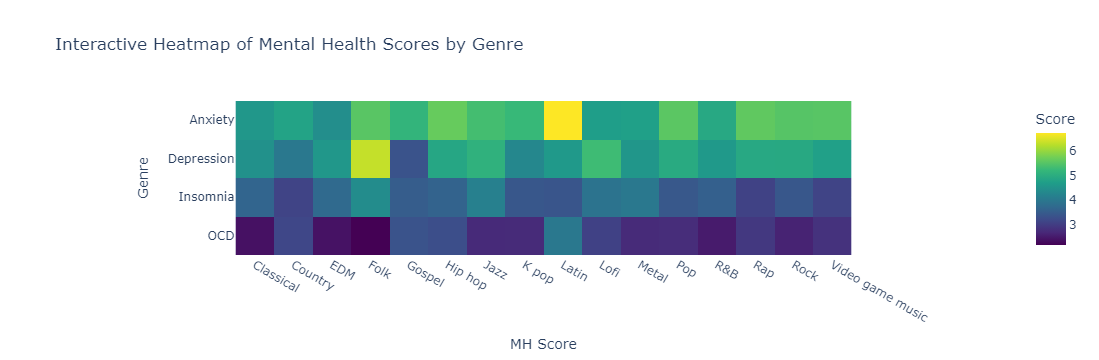

In [127]:
#looked at HW6 code

#create an interactive heatmap
fig = px.imshow(mh_by_genre.T, labels=dict(x="MH Score", y="Genre", color="Score"), color_continuous_scale="Viridis", 
    title="Interactive Heatmap of Mental Health Scores by Genre",)
# Show the heatmap
fig.show()



In [128]:
#now I'm curious which MH stat is the best to use to predict how a song will make someone feel. Which one has most variability so I can capture more effects?
#looks like Depression just by seeing variety of color in that row
mh_by_genre.describe()
#Yep, depression has the most variability (highest sd)

Anxiety  Depression   Insomnia        OCD
count  16.000000   16.000000  16.000000  16.000000
mean    5.254553    4.726361   3.582446   2.834477
std     0.571800    0.633616   0.378764   0.451759
min     4.413793    3.333333   3.060606   2.153846
25%     4.792328    4.534722   3.393750   2.575000
50%     5.292647    4.687500   3.529412   2.721362
75%     5.544197    4.924342   3.768103   3.073214
max     6.750000    6.346154   4.384615   4.000000

In [129]:
#finally, add our genre impact feature
#above 5 will be a 1
mh_by_genre["Effect"] = np.where(mh_by_genre["Depression"] >= 5, 1, 0)

mh_by_genre

Anxiety  Depression  Insomnia       OCD  Effect
Classical         4.583333    4.472222  3.638889  2.361111       0
Country           4.809524    4.000000  3.095238  3.142857       0
EDM               4.413793    4.586207  3.724138  2.379310       0
Folk              5.538462    6.346154  4.384615  2.153846       1
Gospel            5.166667    3.333333  3.500000  3.333333       0
Hip hop           5.657895    4.868421  3.605263  3.263158       0
Jazz              5.350000    5.100000  4.150000  2.700000       1
K pop             5.235294    4.294118  3.411765  2.705882       0
Latin             6.750000    4.625000  3.375000  4.000000       0
Lofi              4.700000    5.300000  3.900000  3.050000       1
Metal             4.740741    4.555556  4.000000  2.703704       0
Pop               5.561404    4.947368  3.421053  2.736842       0
R&B               4.911765    4.617647  3.558824  2.500000       0
Rap               5.606061    4.909091  3.060606  2.909091       0
Rock              5.516667    4.916667  3.400000  2.600000       0
Video game music  5.531250    4.750000  3.093750  2.812500       0

In [130]:
#just looking at this to see which columns increase and decrease MH
mood_increase_genres = mh_by_genre[mh_by_genre["Effect"] == 0]
mood_decrease_genres = mh_by_genre[mh_by_genre["Effect"] == 1]

In [131]:
increase_index = mood_increase_genres.index
increase_index

Index(['Classical', 'Country', 'EDM', 'Gospel', 'Hip hop', 'K pop', 'Latin',
       'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music'],
      dtype='object')

In [132]:
decrease_index = mood_decrease_genres.index
decrease_index

Index(['Folk', 'Jazz', 'Lofi'], dtype='object')

In [133]:
#This dataframe will be used to connect this analysis with a second dataset.
effect_df = mh_by_genre.reset_index(names='Genre')
effect_df.drop(["Anxiety", "Depression", "OCD", "Insomnia"], axis=1)


Genre  Effect
0          Classical       0
1            Country       0
2                EDM       0
3               Folk       1
4             Gospel       0
5            Hip hop       0
6               Jazz       1
7              K pop       0
8              Latin       0
9               Lofi       1
10             Metal       0
11               Pop       0
12               R&B       0
13               Rap       0
14              Rock       0
15  Video game music       0

# Second Dataset

* Add a second dataset to have a song library to pull recommendations from based on the binary class feature created above
* Found this dataset on [Kaggle](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019)

In [134]:
songs = pd.read_csv("songs_normalize.csv")
songs

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode  \
0        False  2000          77         0.751   0.834    1    -5.444     0   
1        False  1999          79         0.434   0.897    0    -4.918     1   
2        False  1999          66         0.529   0.496    7    -9.007     1   
3        False  2000          78         0.551   0.913    0    -4.063     0   
4        False  2000          65         0.614   0.928    8    -4.806     0   
...        ...   ...         ...           ...     ...  ...       ...   ...   
1995     False  2019          79         0.842   0.734    1    -5.065     0   
1996     False  2019          78         0.552   0.702    9    -5.707     1   
1997     False  2019          69         0.847   0.678    9    -8.635     1   
1998     False  2019          75         0.741   0.520    8    -7.513     1   
1999     False  2019          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.3000          0.000018    0.3550    0.894   95.053   
1          0.0488        0.0103          0.000000    0.6120    0.684  148.726   
2          0.0290        0.1730          0.000000    0.2510    0.278  136.859   
3          0.0466        0.0263          0.000013    0.3470    0.544  119.992   
4          0.0516        0.0408          0.001040    0.0845    0.879  172.656   
...           ...           ...               ...       ...      ...      ...   
1995       0.0588        0.0427          0.000000    0.1060    0.952  137.958   
1996       0.1570        0.1170          0.000021    0.1050    0.564  169.994   
1997       0.1090        0.0669          0.000000    0.2740    0.811   97.984   
1998       0.0656        0.4500          0.000002    0.2220    0.347  102.998   
1999       0.0395        0.1920          0.002440    0.0863    0.553  120.042   

                 genre  
0                  pop  
1            rock, pop  
2         pop, country  
3          rock, metal  
4                  pop  
...                ...  
1995               pop  
1996               pop  
1997  hip hop, country  
1998               pop  
1999           hip hop  

[2000 rows x 18 columns]

### The first thing I'm doing is deleting the explicit songs to make the app more appropriate for any user.

In [135]:
songs = songs[songs["explicit"] == False]
songs["explicit"].unique()

array([False])

## What are our features?

In [136]:
len(songs.columns)

18

We have 18 features in this second dataset.

In [137]:
songs.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

#### Feature description (from the Kaggle site)
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* 
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

## Any missing vals? No.

In [138]:
songs.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

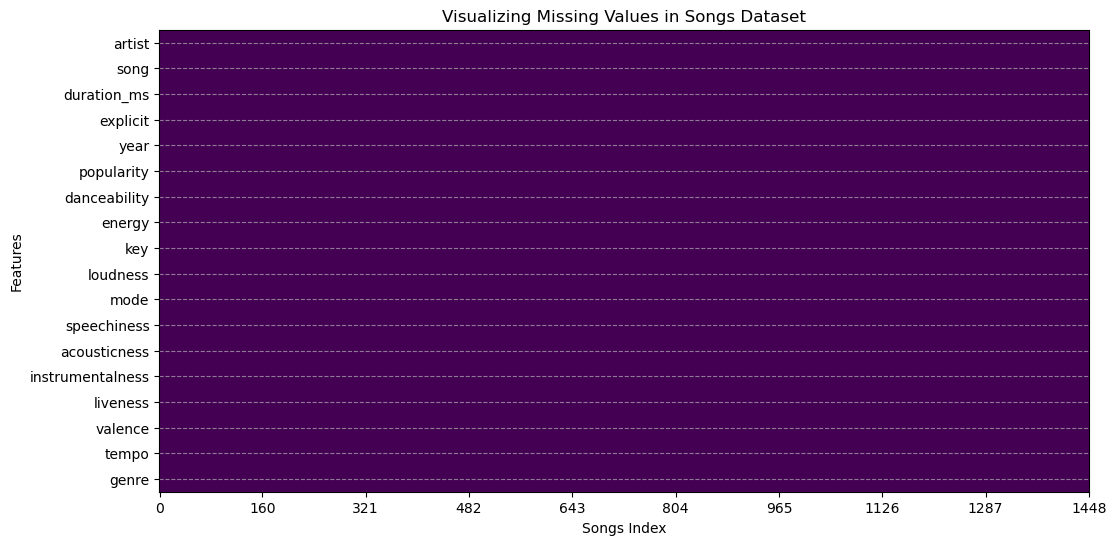

In [139]:
#make a heatmap of the missing data

##################Using code given in ICA 2 

#import numpy and nickname it np
import numpy as np 

#import matplotlib as plt
import matplotlib.pyplot as plt

# create a boolean mask: True for NaN, False for finite values
nan_mask = songs.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot 12 x 6 
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
# interpoltation is finding the best fit of data 
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

# label the x axis Planet Index
plt.xlabel('Songs Index')
# label the y axis Features
plt.ylabel('Features')
# title the whole plot Visualizing Missing Values in a Dataset 
plt.title('Visualizing Missing Values in Songs Dataset')

# y-axis tick labels to feature names
# make the y-axis go from 0 to 4 and label them the names of the subset columns
plt.yticks(range(len(songs.columns)), songs.columns)

# x-axis ticks
#
num_songs = nan_array.shape[0]
plt.xticks(np.linspace(0, num_songs-1, min(10, num_songs)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


## How many unique songs, artists, and genres do we have?

##### artist

In [140]:
songs["artist"].nunique()

655

##### song

In [141]:
songs["song"].nunique()

1365

In [142]:
#any duplicated songs? Yes
len(songs["song"])

1449

In [143]:
#are these just duplicated titles?

AI Citation
* I used AI to figure out how to see if songs were truly duplicated or if they just had the same title since there is no song id.
* Version:  ChatGPT-4.
* Date used: October 20, 2024
* Explanation of code is included in the comments of the cell.

In [144]:
#check for duplicates using multiple columns (e.g., Title, Artist, and Duration)
true_duplicates = songs[songs.duplicated(subset=['song', 'artist', 'duration_ms'], keep=False)]
print(true_duplicates)

               artist                      song  duration_ms  explicit  year  \
20        Linkin Park                In the End       216880     False  2000   
36      Kylie Minogue           Spinning Around       207866     False  2000   
63        Craig David                Fill Me In       257200     False  2000   
85    Destiny's Child  Independent Women, Pt. 1       221133     False  2001   
90          Gabrielle                      Rise       219093     False  2001   
...               ...                       ...          ...       ...   ...   
1682       Jonas Blue                  Fast Car       212424     False  2015   
1736        Jax Jones                   Breathe       207629     False  2017   
1819    Billie Eilish      lovely (with Khalid)       200185     False  2018   
1832        Jax Jones                   Breathe       207629     False  2017   
1929    Billie Eilish      lovely (with Khalid)       200185     False  2018   

      popularity  danceability  energy 

Okay so the difference in songs["song"].nunique() and len(songs["song"]) is only because there are common song titles, not duplicated songs in the dataset.

##### genre

In [145]:
songs["genre"].nunique()

57

In [146]:
songs["genre"].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal', 'pop, rock',
       'pop, R&B', 'Dance/Electronic', 'pop, Dance/Electronic',
       'hip hop, pop, R&B', 'rock, Folk/Acoustic, easy listening',
       'metal', 'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'hip hop, pop',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'World/Traditional, Folk/Acoustic', 'Folk/Acoustic, pop', 'set()',
       'rock, easy listening', 'World/Traditional, hip hop',
       'hip hop, pop, R&B, latin', 'rock, blues',
       'rock, R&B, Folk/Acoustic, pop', 'hip hop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'country', 'hip hop, pop, Dance/Elec

## Some songs have more than one genre listed. I want to fix this by creating duplicates so that the song is listed once per genre classification - that way, the app will recommend a pop rock song for pop recommendations and rock recommendations. 

AI Citation:
* I used AI below to remove duplicated songs because the way I tried doing it didn't work. This is how I learned about the drop_duplicates function. I also used it to split apart the songs listed as multiple genres and creare duplicates of them with one genre per duplicate.
* Version:  ChatGPT-4.
* Date used: October 20, 2024
* Explanation of code is included in the comments of the cell.

In [147]:
#I was wrong, no duplicated songs

# #First, I'll drop the already dupliated songs 
# #songs = songs_normalize[songs_normalize["song"].unique()] ############# this didn't work so I used AI in the next line

# #the drop_duplicates function removes all but the first occurrence of duplicate rows based on the song column
# songs = songs.drop_duplicates(subset="song")
# #using len to check that this work; should now be the number of original unqiue songs (1365)
# len(songs["song"])



In [148]:
#Now, I'll create my own duplicated songs by separating the genre column by "," so that each song is listed as many times as genres it qualifies as 
#split the 'genre' column by commas, creating lists of genres
#split the strings by "," since that's how the multiple genres are listed in the genre column
##########str.split(",") splits the genre string into a list of genres.
songs["genre"] = songs["genre"].str.split(",")

#explode the dataset so each genre gets its own row
######explode() expands the list of genres so each genre has its own row, duplicating other information about the song.
#####reset_index(drop=True)  resets the index to keep things neat after exploding.
songs_expanded = songs.explode("genre").reset_index(drop=True)

#what does the dataset look like now
songs_expanded
#check the new number of rows (duplicated songs)
len(songs_expanded)

2656

### Will also have to handle different genre names than what our first dataset has

* EDM is the same as Electronic/Dance
* should i list Folk/Acoustic as just Folk? We don't have acoustic in our first dataset
* We don't have World/Traditional in our first dataset, I'll just delete those

In [149]:
songs_expanded["genre"].unique()

array(['pop', 'rock', ' pop', ' country', ' metal', ' rock', ' R&B',
       'Dance/Electronic', ' Dance/Electronic', 'hip hop',
       ' Folk/Acoustic', ' easy listening', 'metal', 'R&B', ' latin',
       'Folk/Acoustic', ' blues', 'World/Traditional', 'set()',
       ' hip hop', 'latin', ' jazz', 'country', ' classical',
       'easy listening'], dtype=object)

* what is set() ?
* I'm noticing there are some that include an extra space so they're read twice. I fixed that in the cell below.
* Also going to have to make sure the capitalization is consistent with the first dataset

#### Deleting extra space typo in the genre titles so they're consistent

In [150]:
#songs_expanded["genre"]==[" Folk/Acoustic"].replace("Folk/Acoustic")
songs_expanded["genre"] = songs_expanded["genre"].replace(" Folk/Acoustic", "Folk/Acoustic")
songs_expanded["genre"] = songs_expanded["genre"].replace(" Dance/Electronic", "Dance/Electronic")
songs_expanded["genre"] = songs_expanded["genre"].replace(" pop", "pop")
songs_expanded["genre"] = songs_expanded["genre"].replace(" hip hop", "hip hop")
songs_expanded["genre"] = songs_expanded["genre"].replace(" country", "country")
songs_expanded["genre"] = songs_expanded["genre"].replace(" metal", "metal")
songs_expanded["genre"] = songs_expanded["genre"].replace(" R&B", "R&B")
songs_expanded["genre"] = songs_expanded["genre"].replace(" rock", "rock")
songs_expanded["genre"] = songs_expanded["genre"].replace(" easy listening", "easy listening")
songs_expanded["genre"] = songs_expanded["genre"].replace(" latin", "latin")
songs_expanded["genre"] = songs_expanded["genre"].replace(" classical", "classical")
songs_expanded["genre"] = songs_expanded["genre"].replace(" blues", "blues")
songs_expanded["genre"] = songs_expanded["genre"].replace(" jazz", "Jazz")


In [151]:
#making sure the abobe worked
songs_expanded["genre"].unique()

array(['pop', 'rock', 'country', 'metal', 'R&B', 'Dance/Electronic',
       'hip hop', 'Folk/Acoustic', 'easy listening', 'latin', 'blues',
       'World/Traditional', 'set()', 'Jazz', 'classical'], dtype=object)

### Do I want to combine blues and R&B? Or Jazz/classical and easy listening?

#### Making consistent with first dataset

#### What were the first dataset's genres?
'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',

In [152]:
#changing capitalization and wording
songs_expanded["genre"] = songs_expanded["genre"].replace("pop", "Pop")
songs_expanded["genre"] = songs_expanded["genre"].replace("rock", "Rock")
songs_expanded["genre"] = songs_expanded["genre"].replace("country", "Country")
songs_expanded["genre"] = songs_expanded["genre"].replace("metal", "Metal")
songs_expanded["genre"] = songs_expanded["genre"].replace("hip hop", "Hip hop")
songs_expanded["genre"] = songs_expanded["genre"].replace("Dance/Electronic", "EDM")
songs_expanded["genre"] = songs_expanded["genre"].replace("Folk/Acoustic", "Folk")
songs_expanded["genre"] = songs_expanded["genre"].replace("latin", "Latin")
songs_expanded["genre"] = songs_expanded["genre"].replace("jazz", "Jazz")
songs_expanded["genre"] = songs_expanded["genre"].replace("classical", "Classical")

In [153]:
songs_expanded["genre"].unique()

array(['Pop', 'Rock', 'Country', 'Metal', 'R&B', 'EDM', 'Hip hop', 'Folk',
       'easy listening', 'Latin', 'blues', 'World/Traditional', 'set()',
       'Jazz', 'Classical'], dtype=object)

### What is set()

In [154]:
songs_expanded[songs_expanded["genre"] == "set()"]

artist                                               song  \
323       Las Ketchup     The Ketchup Song (Aserejé) - Spanglish Version   
415     Blazin' Squad                            Crossroads - Radio Edit   
605    George Michael                                            Amazing   
644         DJ Casper                        Cha Cha Slide - Hardino Mix   
735    Brian McFadden                                        Almost Here   
891              Meck             Thunder in My Heart Again (Radio Edit)   
983          Ida Corr                              Let Me Think About It   
1005    Camille Jones              The Creeps - Fedde Le Grand Radio Mix   
1087    Elliott Yamin                                       Wait for You   
1088      Wyclef Jean  Sweetest Girl (Dollar Bill) (feat. Akon, Lil' ...   
1320      A.R. Rahman                       Jai Ho! (You Are My Destiny)   
1469           K'NAAN                                        Wavin' Flag   
1793            Gotye                       Somebody That I Used To Know   
1862      John Newman                                      Love Me Again   
1972           MAGIC!                                               Rude   
2045     Milky Chance                                       Stolen Dance   
2095  Natalie La Rose                                           Somebody   
2447   Zay Hilfigerrr                      Juju on That Beat (TZ Anthem)   
2504               EO                                             German   
2632         Ashley O                                          On A Roll   

      duration_ms  explicit  year  popularity  danceability  energy  key  \
323        213973     False  2002          66         0.607   0.923    1   
415        188693     False  2012          40         0.661   0.746    4   
605        265826     False  2004          57         0.805   0.754   10   
644        222146     False  2004          51         0.853   0.911   11   
735        229826     False  2004          42         0.561   0.452    9   
891        189800     False  2005          46         0.679   0.922    2   
983        151973     False  2012          43         0.762   0.754    0   
1005       152333     False  2006          17         0.847   0.861    6   
1087       261320     False  2007          58         0.764   0.487    0   
1088       241133     False  2007          56         0.733   0.744    1   
1320       222400     False  2009          65         0.657   0.941    8   
1469       220520     False  2009          57         0.625   0.699    0   
1793       244884     False  2011          57         0.863   0.527    0   
1862       239894     False  2013          74         0.495   0.894    2   
1972       224840     False  2014          80         0.773   0.758    1   
2045       313684     False  2014          73         0.885   0.581   11   
2095       189906     False  2014          66         0.830   0.520    0   
2447       144244     False  2016          57         0.807   0.887    1   
2504       170825     False  2018          67         0.862   0.583    8   
2632       154447     False  2019          57         0.736   0.810    5   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
323     -6.777     1       0.0948      0.019300          0.000001    0.0924   
415     -5.153     1       0.0420      0.109000          0.000000    0.3250   
605     -6.825     0       0.0394      0.088400          0.000002    0.1170   
644     -6.722     0       0.1250      0.043600          0.005710    0.2870   
735     -7.324     0       0.0336      0.409000          0.000000    0.1060   
891     -4.670     0       0.0294      0.000241          0.690000    0.0697   
983     -3.425     0       0.0460      0.000220          0.066500    0.1460   
1005    -6.632     1       0.0603      0.278000          0.029000    0.0626   
1087    -6.734     1       0.0281      0.250000          0.000000    0.1840   
1088    -3.510     1       0.05

I learned after googling that this happens when you store multiple variables. Maybe these songs have several genre classifications. I'll delete them since that's just how the data came (didn't result as a mishap of my analysis).

In [155]:
songs_expanded = songs_expanded[songs_expanded["genre"] != "set()"]
songs_expanded["genre"].unique()

array(['Pop', 'Rock', 'Country', 'Metal', 'R&B', 'EDM', 'Hip hop', 'Folk',
       'easy listening', 'Latin', 'blues', 'World/Traditional', 'Jazz',
       'Classical'], dtype=object)

## Let's check the original distribution of the dataset (Any outliers? Is it imbalanced?)

* I'll only be balancing valence, danceability, and energy for now

<Axes: xlabel='valence', ylabel='Count'>

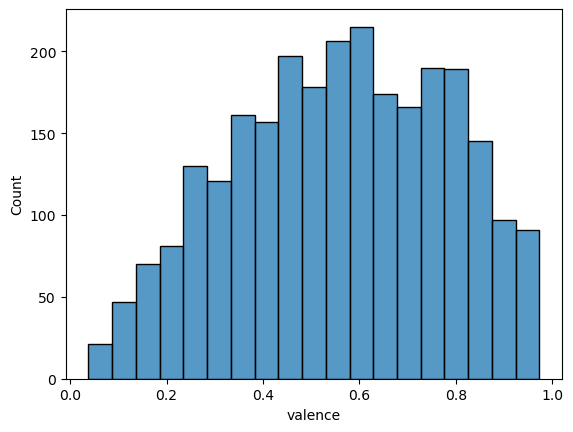

In [156]:
sns.histplot(data=songs_expanded, x='valence')

## AI Citation below: 
* I used AI below to make valence balanced by undersampling
* Version:  ChatGPT-4.
* Date used: October 20, 2024
* Explanation of code is included in the comments of the cell.

In [157]:
#let's make valence balanced

In [158]:
#make sure the index is not missing any values after deleting some observations above
#I get an error when I try to undersample without doing this first
songs_expanded.reset_index(drop=True, inplace=True)

In [159]:
#make valence categorical first so we can use undersampling on it (just gonna make it binary, above 0.5 or not)
#bin 'valence' into two categories: low (0) or high (1)
#####create the target column (valence_category) based on the valence threshold
songs_expanded["valence_category"] = np.where(songs_expanded["valence"] >= 0.5, 1, 0)


In [160]:
#import the undersampling package
from imblearn.under_sampling import RandomUnderSampler

#separate features (X) and target (y)
#drop the continuous feature and the categorical version we just made
X = songs_expanded.drop(["valence", "valence_category"], axis=1)  # Keep only non-target features
#look at the categorical version as the target 
y = songs_expanded["valence_category"]  # Target variable

#apply RandomUnderSampler
#initialize it
rus = RandomUnderSampler(random_state=42)
#apply it to X and y and store the changed versions
X_resampled, y_resampled = rus.fit_resample(X, y)

#print the differences so we can see that the package did its job
print(f"Before Undersampling: \n{y.value_counts()}")
print(f"After Undersampling: \n{y_resampled.value_counts()}")


Before Undersampling: 
valence_category
1    1588
0    1048
Name: count, dtype: int64
After Undersampling: 
valence_category
0    1048
1    1048
Name: count, dtype: int64


In [161]:
#look at this to see what it looks like now
#X_resampled

In [162]:
##############add those balanced observations back to the dataset

#okay now I want to delete the categorical variable we made and return the original continuous values that match the resampling
#get the indices of the resampled data
resampled_indices = rus.sample_indices_

#use the indices to retrieve the original continuous valence values
valence_resampled = songs_expanded.loc[resampled_indices, "valence"]

#create the final resampled dataset with original continuous valence values
songs_balanced = X_resampled.copy()  #start with resampled features
songs_balanced["valence"] = valence_resampled.values  #add back continuous valence


<Axes: xlabel='valence_category', ylabel='Count'>

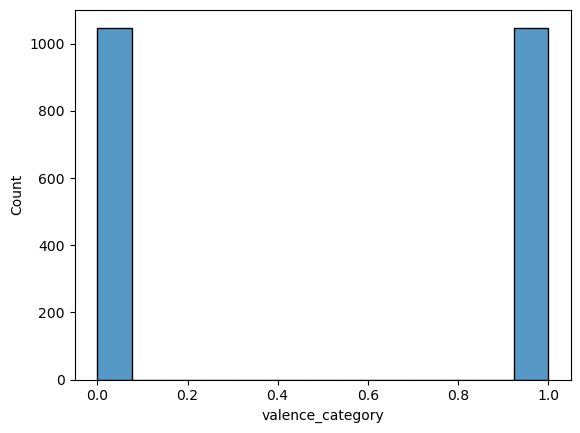

In [163]:
#make a plot to see that it worked
songs_balanced["valence_category"] = np.where(songs_balanced["valence"] >= 0.5, 1, 0)
sns.histplot(data=songs_balanced, x='valence_category')


In [164]:
#now drop that column, just created that to check

In [165]:
songs_balanced = songs_balanced.drop(["valence_category"], axis=1) 

In [166]:
## Now do the same for energy

<Axes: xlabel='energy', ylabel='Count'>

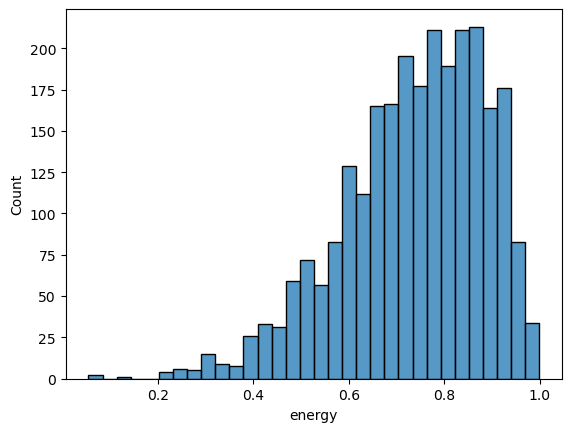

In [167]:
sns.histplot(data=songs_expanded, x='energy')

In [168]:
songs_expanded["energy_category"] = np.where(songs_expanded["energy"] >= 0.5, 1, 0)

In [169]:
X = songs_expanded.drop(["energy", "energy_category"], axis=1)  
y = songs_expanded["energy_category"] 

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Before Undersampling: \n{y.value_counts()}")
print(f"After Undersampling: \n{y_resampled.value_counts()}")


Before Undersampling: 
energy_category
1    2433
0     203
Name: count, dtype: int64
After Undersampling: 
energy_category
0    203
1    203
Name: count, dtype: int64


In [170]:
resampled_indices = rus.sample_indices_

energy_resampled = songs_expanded.loc[resampled_indices, "energy"]

songs_balanced = X_resampled.copy()  
songs_balanced["energy"] = energy_resampled.values  


<Axes: xlabel='energy_category', ylabel='Count'>

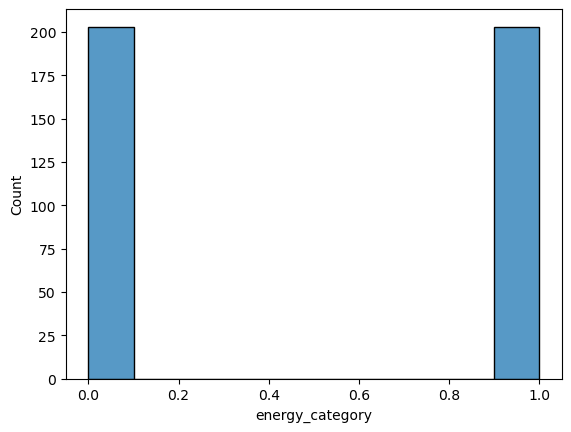

In [171]:
#make a plot to see that it worked
songs_balanced["energy_category"] = np.where(songs_balanced["energy"] >= 0.5, 1, 0)
sns.histplot(data=songs_balanced, x='energy_category')


In [172]:
songs_balanced = songs_balanced.drop(["energy_category"], axis=1) 

In [173]:
# #is valence still balanced? ############# good enough
# songs_balanced["valence_category"] = np.where(songs_balanced["valence"] >= 0.5, 1, 0)
# sns.histplot(data=songs_balanced, x='valence_category')


In [174]:
# songs_balanced.drop(["valence_category"], axis=1) 

In [175]:
## Now do the same for danceability

<Axes: xlabel='danceability', ylabel='Count'>

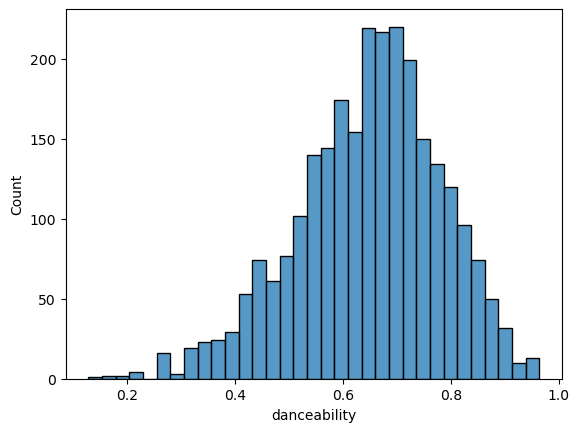

In [176]:
sns.histplot(data=songs_expanded, x='danceability')

In [177]:
songs_expanded["danceability_category"] = np.where(songs_expanded["danceability"] >= 0.5, 1, 0)

In [178]:
X = songs_expanded.drop(["danceability", "danceability_category"], axis=1)  
y = songs_expanded["danceability_category"] 

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Before Undersampling: \n{y.value_counts()}")
print(f"After Undersampling: \n{y_resampled.value_counts()}")


Before Undersampling: 
danceability_category
1    2276
0     360
Name: count, dtype: int64
After Undersampling: 
danceability_category
0    360
1    360
Name: count, dtype: int64


In [179]:
resampled_indices = rus.sample_indices_

danceability_resampled = songs_expanded.loc[resampled_indices, "danceability"]

songs_balanced = X_resampled.copy()  
songs_balanced["danceability"] = danceability_resampled.values  


<Axes: xlabel='danceability_category', ylabel='Count'>

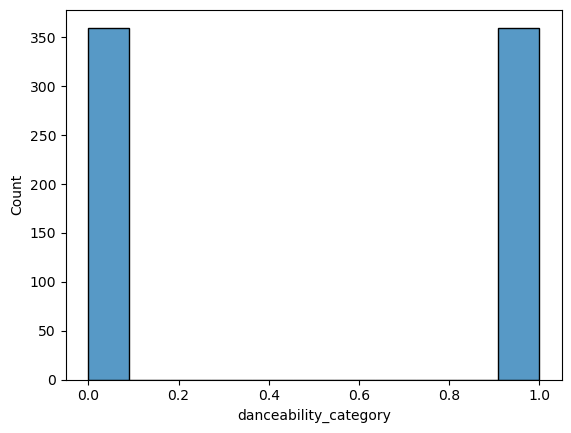

In [180]:
#make a plot to see that it worked
songs_balanced["danceability_category"] = np.where(songs_balanced["danceability"] >= 0.5, 1, 0)
sns.histplot(data=songs_balanced, x='danceability_category')


In [181]:
songs_balanced = songs_balanced.drop(["danceability_category"], axis=1) 

<Axes: xlabel='duration_ms', ylabel='Count'>

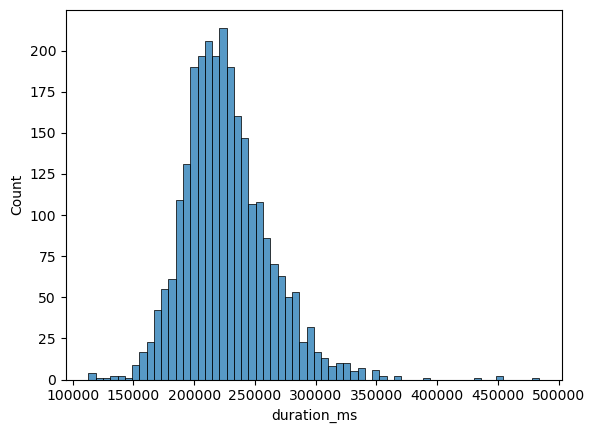

In [182]:
sns.histplot(data=songs_expanded, x='duration_ms')

<Axes: xlabel='popularity', ylabel='Count'>

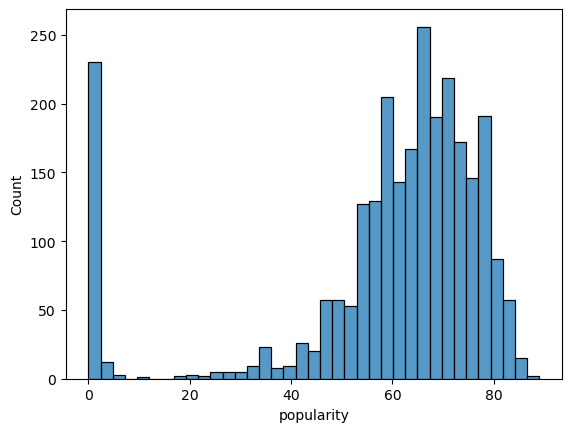

In [183]:
sns.histplot(data=songs_expanded, x='popularity')

<Axes: xlabel='tempo', ylabel='Count'>

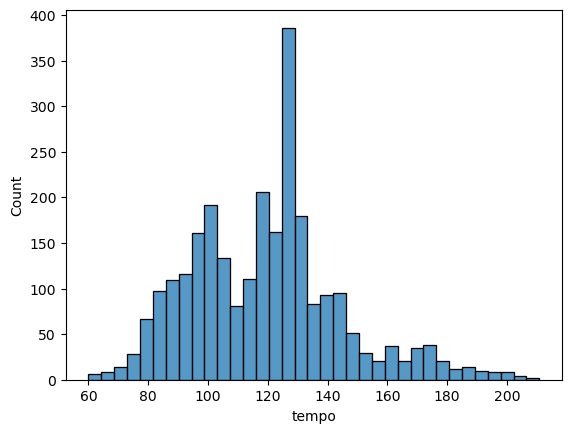

In [184]:
sns.histplot(data=songs_expanded, x='tempo')

In [185]:
#fix the index just in case
songs_expanded.reset_index(drop=True, inplace=True)

### EDA: Feature Engineering and Merging Datasets

### Add in our Effect column and mean MH scores from the first dataset so we can analyze the songs and mental health
* I originally planned to only use Effect but I like having mean MH scores for each genre. That could help the genre recommendation rely on mental health stats even more. Now, I plan to add these four columns to each observation of the second dataset by joining on genre. So then I'll have an average MH score for each song. (Maybe I should've chosen median, because they're all basically the same number (4-5))

In [186]:
effect_df

Genre   Anxiety  Depression  Insomnia       OCD  Effect
0          Classical  4.583333    4.472222  3.638889  2.361111       0
1            Country  4.809524    4.000000  3.095238  3.142857       0
2                EDM  4.413793    4.586207  3.724138  2.379310       0
3               Folk  5.538462    6.346154  4.384615  2.153846       1
4             Gospel  5.166667    3.333333  3.500000  3.333333       0
5            Hip hop  5.657895    4.868421  3.605263  3.263158       0
6               Jazz  5.350000    5.100000  4.150000  2.700000       1
7              K pop  5.235294    4.294118  3.411765  2.705882       0
8              Latin  6.750000    4.625000  3.375000  4.000000       0
9               Lofi  4.700000    5.300000  3.900000  3.050000       1
10             Metal  4.740741    4.555556  4.000000  2.703704       0
11               Pop  5.561404    4.947368  3.421053  2.736842       0
12               R&B  4.911765    4.617647  3.558824  2.500000       0
13               Rap  5.606061    4.909091  3.060606  2.909091       0
14              Rock  5.516667    4.916667  3.400000  2.600000       0
15  Video game music  5.531250    4.750000  3.093750  2.812500       0

In [187]:
#reminder of what df#2 has 

In [188]:
songs_expanded["genre"].unique()

array(['Pop', 'Rock', 'Country', 'Metal', 'R&B', 'EDM', 'Hip hop', 'Folk',
       'easy listening', 'Latin', 'blues', 'World/Traditional', 'Jazz',
       'Classical'], dtype=object)

I won't consider the genres that both datasets don't have (ex: Video game music,  Gospel, K pop, Lofi, blues, easy listening, Rap, World/Traditional)

In [189]:
#let's delete the genres that both dfs don't share
#effect_df = effect_df[effect_df["Genre"] != [("Video game music", "Gospel", "K pop", "Lofi", "Rap")]]
#songs_expanded = songs_expanded[songs_expanded["genre"] != [("blues", "easy listening", "World/Traditional")]]

AI Citation
* I had to use AI above because the way I was trying to delete certain genres wouldn't work.
* Version:  ChatGPT-4.
* Date used: October 20, 2024
* Explanation of code is included in the comments of the cell.

In [190]:
#let's delete the genres that both dfs don't share

#define the genres to drop from each dataframe
genres_to_drop_from_effect = ["Video game music", "Gospel", "K pop", "Lofi", "Rap"]
genres_to_drop_from_songs = ["blues", "easy listening", "World/Traditional"]

#filter out the genres in effect_df but not in songs_expanded
###isin() checks if each value in the specified column is contained in the provided list of genres
###the ~ negates the condition, so we keep only the rows where the genre is not in the list.
effect_df = effect_df[~effect_df["Genre"].isin(genres_to_drop_from_effect)]

#filter out the genres in songes_expanded but not in effect_df 
songs_expanded = songs_expanded[~songs_expanded["genre"].isin(genres_to_drop_from_songs)]


#### Did that work?

In [191]:
effect_df

Genre   Anxiety  Depression  Insomnia       OCD  Effect
0   Classical  4.583333    4.472222  3.638889  2.361111       0
1     Country  4.809524    4.000000  3.095238  3.142857       0
2         EDM  4.413793    4.586207  3.724138  2.379310       0
3        Folk  5.538462    6.346154  4.384615  2.153846       1
5     Hip hop  5.657895    4.868421  3.605263  3.263158       0
6        Jazz  5.350000    5.100000  4.150000  2.700000       1
8       Latin  6.750000    4.625000  3.375000  4.000000       0
10      Metal  4.740741    4.555556  4.000000  2.703704       0
11        Pop  5.561404    4.947368  3.421053  2.736842       0
12        R&B  4.911765    4.617647  3.558824  2.500000       0
14       Rock  5.516667    4.916667  3.400000  2.600000       0

In [192]:
songs_expanded["genre"].unique()

array(['Pop', 'Rock', 'Country', 'Metal', 'R&B', 'EDM', 'Hip hop', 'Folk',
       'Latin', 'Jazz', 'Classical'], dtype=object)

In [193]:
#reminder that Effect is only based on whether Depression is above 5 or below 5, doesn't consider the other three average scores

In [194]:
#How I was originally trying to join the datasets before using AI (two cells below)

In [195]:
# #make empty columns first 
# songs_expanded["Anxiety"] = []
# songs_expanded["Depression"] = []
# songs_expanded["Insomnia"] = []
# songs_expanded["OCD"] = []

In [196]:
# #start joining datasets (getting ready to use a large loop like I did for the first dataset)

# for i, val in enumerate(mxmh_survey_results["BPM"].isna()):
#         #get the genre for the current row
#         genre = mxmh_survey_results.loc[i, "Fav genre"]  
#         if genre == "Latin":
#             mxmh_survey_results.loc[i, "BPM"] = mxmh_survey_results[mxmh_survey_results["Fav genre"] == "Latin"]["BPM"].median()

AI Citation 
* I used AI to merge the two datasets because the way I was trying to do it above was already too complicated. It can be done in fewer lines.
* Version:  ChatGPT-4.
* Date used: October 16, 2024
* Explanation of code is included in the comments of the cell.

In [197]:
#First I have to make sure the genre columns are capitalized the same
songs_expanded.rename(columns={'genre': 'Genre'}, inplace=True)

In [198]:
# Merge the two DataFrames based on the 'genre' column
merged_df = pd.merge(songs_expanded, effect_df, on='Genre', how='left')
songs_expanded.rename(columns={'Effect': 'Effect (based on Dep)'}, inplace=True)
merged_df

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2          blink-182                    All The Small Things       167066   
3         Faith Hill                                 Breathe       250546   
4         Faith Hill                                 Breathe       250546   
...              ...                                     ...          ...   
2611    Taylor Swift                            Cruel Summer       178426   
2612    Blanco Brown                              The Git Up       200593   
2613    Blanco Brown                              The Git Up       200593   
2614       Sam Smith  Dancing With A Stranger (with Normani)       171029   
2615     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  ...  \
0        False  2000          77         0.751   0.834    1    -5.444  ...   
1        False  1999          79         0.434   0.897    0    -4.918  ...   
2        False  1999          79         0.434   0.897    0    -4.918  ...   
3        False  1999          66         0.529   0.496    7    -9.007  ...   
4        False  1999          66         0.529   0.496    7    -9.007  ...   
...        ...   ...         ...           ...     ...  ...       ...  ...   
2611     False  2019          78         0.552   0.702    9    -5.707  ...   
2612     False  2019          69         0.847   0.678    9    -8.635  ...   
2613     False  2019          69         0.847   0.678    9    -8.635  ...   
2614     False  2019          75         0.741   0.520    8    -7.513  ...   
2615     False  2019          85         0.695   0.762    0    -3.497  ...   

        tempo    Genre  valence_category  energy_category  \
0      95.053      Pop                 1                1   
1     148.726     Rock                 1                1   
2     148.726      Pop                 1                1   
3     136.859      Pop                 0                0   
4     136.859  Country                 0                0   
...       ...      ...               ...              ...   
2611  169.994      Pop                 1                1   
2612   97.984  Hip hop                 1                1   
2613   97.984  Country                 1                1   
2614  102.998      Pop                 0                1   
2615  120.042  Hip hop                 1                1   

      danceability_category   Anxiety  Depression  Insomnia       OCD  Effect  
0                         1  5.561404    4.947368  3.421053  2.736842       0  
1                         0  5.516667    4.916667  3.400000  2.600000       0  
2                         0  5.561404    4.947368  3.421053  2.736842       0  
3                         1  5.561404    4.947368  3.421053  2.736842       0  
4                         1  4.809524    4.000000  3.095238  3.142857       0  
...                     ...       ...         ...       ...       ...     ...  
2611                      1  5.561404    4.947368  3.421053  2.736842       0  
2612                      1  5.657895    4.868421  3.605263  3.263158       0  
2613                      1  4.809524    4.000000  3.095238  3.142857       0  
2614                      1  5.561404    4.947368  3.421053  2.736842       0  
2615                      1  5.657895    4.868421  3.605263  3.263158       0  

[2616 rows x 26 columns]

In [199]:
#I dont know why valence_category, energy_category, and danceability_category are still there. I made sure to drop them earlier.
merged_df = merged_df.drop(["danceability_category"], axis=1) 
merged_df = merged_df.drop(["energy_category"], axis=1) 
merged_df = merged_df.drop(["valence_category"], axis=1) 
merged_df

artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2          blink-182                    All The Small Things       167066   
3         Faith Hill                                 Breathe       250546   
4         Faith Hill                                 Breathe       250546   
...              ...                                     ...          ...   
2611    Taylor Swift                            Cruel Summer       178426   
2612    Blanco Brown                              The Git Up       200593   
2613    Blanco Brown                              The Git Up       200593   
2614       Sam Smith  Dancing With A Stranger (with Normani)       171029   
2615     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  ...  \
0        False  2000          77         0.751   0.834    1    -5.444  ...   
1        False  1999          79         0.434   0.897    0    -4.918  ...   
2        False  1999          79         0.434   0.897    0    -4.918  ...   
3        False  1999          66         0.529   0.496    7    -9.007  ...   
4        False  1999          66         0.529   0.496    7    -9.007  ...   
...        ...   ...         ...           ...     ...  ...       ...  ...   
2611     False  2019          78         0.552   0.702    9    -5.707  ...   
2612     False  2019          69         0.847   0.678    9    -8.635  ...   
2613     False  2019          69         0.847   0.678    9    -8.635  ...   
2614     False  2019          75         0.741   0.520    8    -7.513  ...   
2615     False  2019          85         0.695   0.762    0    -3.497  ...   

      instrumentalness  liveness  valence    tempo    Genre   Anxiety  \
0             0.000018    0.3550    0.894   95.053      Pop  5.561404   
1             0.000000    0.6120    0.684  148.726     Rock  5.516667   
2             0.000000    0.6120    0.684  148.726      Pop  5.561404   
3             0.000000    0.2510    0.278  136.859      Pop  5.561404   
4             0.000000    0.2510    0.278  136.859  Country  4.809524   
...                ...       ...      ...      ...      ...       ...   
2611          0.000021    0.1050    0.564  169.994      Pop  5.561404   
2612          0.000000    0.2740    0.811   97.984  Hip hop  5.657895   
2613          0.000000    0.2740    0.811   97.984  Country  4.809524   
2614          0.000002    0.2220    0.347  102.998      Pop  5.561404   
2615          0.002440    0.0863    0.553  120.042  Hip hop  5.657895   

      Depression  Insomnia       OCD  Effect  
0       4.947368  3.421053  2.736842       0  
1       4.916667  3.400000  2.600000       0  
2       4.947368  3.421053  2.736842       0  
3       4.947368  3.421053  2.736842       0  
4       4.000000  3.095238  3.142857       0  
...          ...       ...       ...     ...  
2611    4.947368  3.421053  2.736842       0  
2612    4.868421  3.605263  3.263158       0  
2613    4.000000  3.095238  3.142857       0  
2614    4.947368  3.421053  2.736842       0  
2615    4.868421  3.605263  3.263158       0  

[2616 rows x 23 columns]

### EDA: Let's explore relationships between the features.

#### What is the relationship between valence, energy, danceabilty, and MH score?

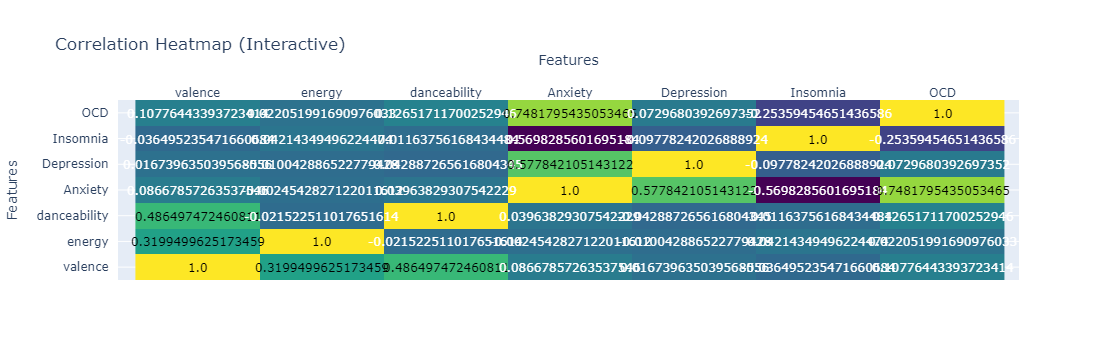

In [200]:
#make an interactive correlation heatmap (HW4)

#which features are important to consider here?
#not title, artists, date, Artist (Ind.), Nationality, Continent, Points (Ind for each Artist/Nat, id, Song URL
############what does # of nationality mean?
selected_features = ['valence',"energy", "danceability", "Anxiety", "Depression", "Insomnia", "OCD"] # Focus on these variables

# Correlation Heatmap (Interactive)
correlation_matrix = merged_df[selected_features].corr().values
fig_heatmap = ff.create_annotated_heatmap(
     z=correlation_matrix,
     x=selected_features,
     y=selected_features,
     colorscale='Viridis'
 )
fig_heatmap.update_layout(
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()


### Recommend Artist based on average axiety level of their songs

In [201]:
merged_df["artist"].nunique()

634

In [202]:
#give me artist recommendations for low anxiety

In [203]:
anxiety_below_5 = merged_df[merged_df["Anxiety"] < 5]
anxiety_below_5["artist"]

4            Faith Hill
6              Bon Jovi
11      Destiny's Child
12                Modjo
19            Melanie C
             ...       
2601               Lauv
2604         Marshmello
2607            Normani
2609         Joel Corry
2613       Blanco Brown
Name: artist, Length: 748, dtype: object

#### Future plans for the final

I want to eventually come up with an equation that each recommendation will be based on that considers all the features (MH stats, valence, energy, danceability, etc). (Ex: user feeling = valence + energy * anxiety) Something like that.